In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [136]:
# 1. 读取数据
df = pd.read_csv('adult.csv', header=0, low_memory=False)

# 2. 查看数据基本信息
print("数据前5行：")
print(df.head())

数据前5行：
   Unnamed: 0 age          workclass    fnlwgt   education  education-num  \
0           0  39          State-gov   77516.0   Bachelors           13.0   
1           1  50   Self-emp-not-inc   83311.0   Bachelors           13.0   
2           2  38            Private  215646.0     HS-grad            9.0   
3           3  53            Private  234721.0        11th            7.0   
4           4  28            Private  338409.0   Bachelors           13.0   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-c

In [137]:
print("\n数据的基本信息：")
print(df.info())


数据的基本信息：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48843 entries, 0 to 48842
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      48843 non-null  int64  
 1   age             48843 non-null  object 
 2   workclass       48842 non-null  object 
 3   fnlwgt          48842 non-null  float64
 4   education       48842 non-null  object 
 5   education-num   48842 non-null  float64
 6   marital-status  48842 non-null  object 
 7   occupation      48842 non-null  object 
 8   relationship    48842 non-null  object 
 9   race            48842 non-null  object 
 10  sex             48842 non-null  object 
 11  capital-gain    48842 non-null  float64
 12  capital-loss    48842 non-null  float64
 13  hours-per-week  48842 non-null  float64
 14  native-country  48842 non-null  object 
 15  predclass       48842 non-null  object 
dtypes: float64(5), int64(1), object(10)
memory usage: 6.0+ MB
None


In [138]:
# 将age列转换为数字类型
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df.dropna(inplace = True)
# 对于predclass列，先进行映射转换（假设<=50K映射为0，>50K映射为1）
df['predclass'] = df['predclass'].map({' <=50K': 0, ' >50K': 1,' <=50K.': 0, ' >50K.': 1})

In [139]:
import numpy as np

# 删掉Cross validator行
df.dropna(inplace=True)
# 将 "?" 替换成空值 np.nan
df.replace(' ?', np.nan, inplace=True)

# 查看替换后缺失情况
print("\n替换 ‘?’ 后缺失值统计：")
print(df.isnull().sum())


替换 ‘?’ 后缺失值统计：
Unnamed: 0           0
age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
predclass            0
dtype: int64


In [140]:
# 使用众数填充缺失值
trans = {'workclass' : df['workclass'].mode()[0], 'occupation' : df['occupation'].mode()[0], 'native-country' : df['native-country'].mode()[0]}
df.fillna(trans, inplace = True)
df.describe()

,Unnamed: 0,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,predclass
count,48842.000000,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,13566.944454,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382,0.239282
std,8999.234235,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444,0.426649
min,0.000000,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,6105.250000,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,12210.500000,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,20349.750000,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,32560.000000,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [141]:
df.isnull().sum()

Unnamed: 0        0
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
predclass         0
dtype: int64

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'fnlwgt'}>],
       [<Axes: title={'center': 'education-num'}>,
        <Axes: title={'center': 'capital-gain'}>,
        <Axes: title={'center': 'capital-loss'}>],
       [<Axes: title={'center': 'hours-per-week'}>,
        <Axes: title={'center': 'predclass'}>, <Axes: >]], dtype=object)

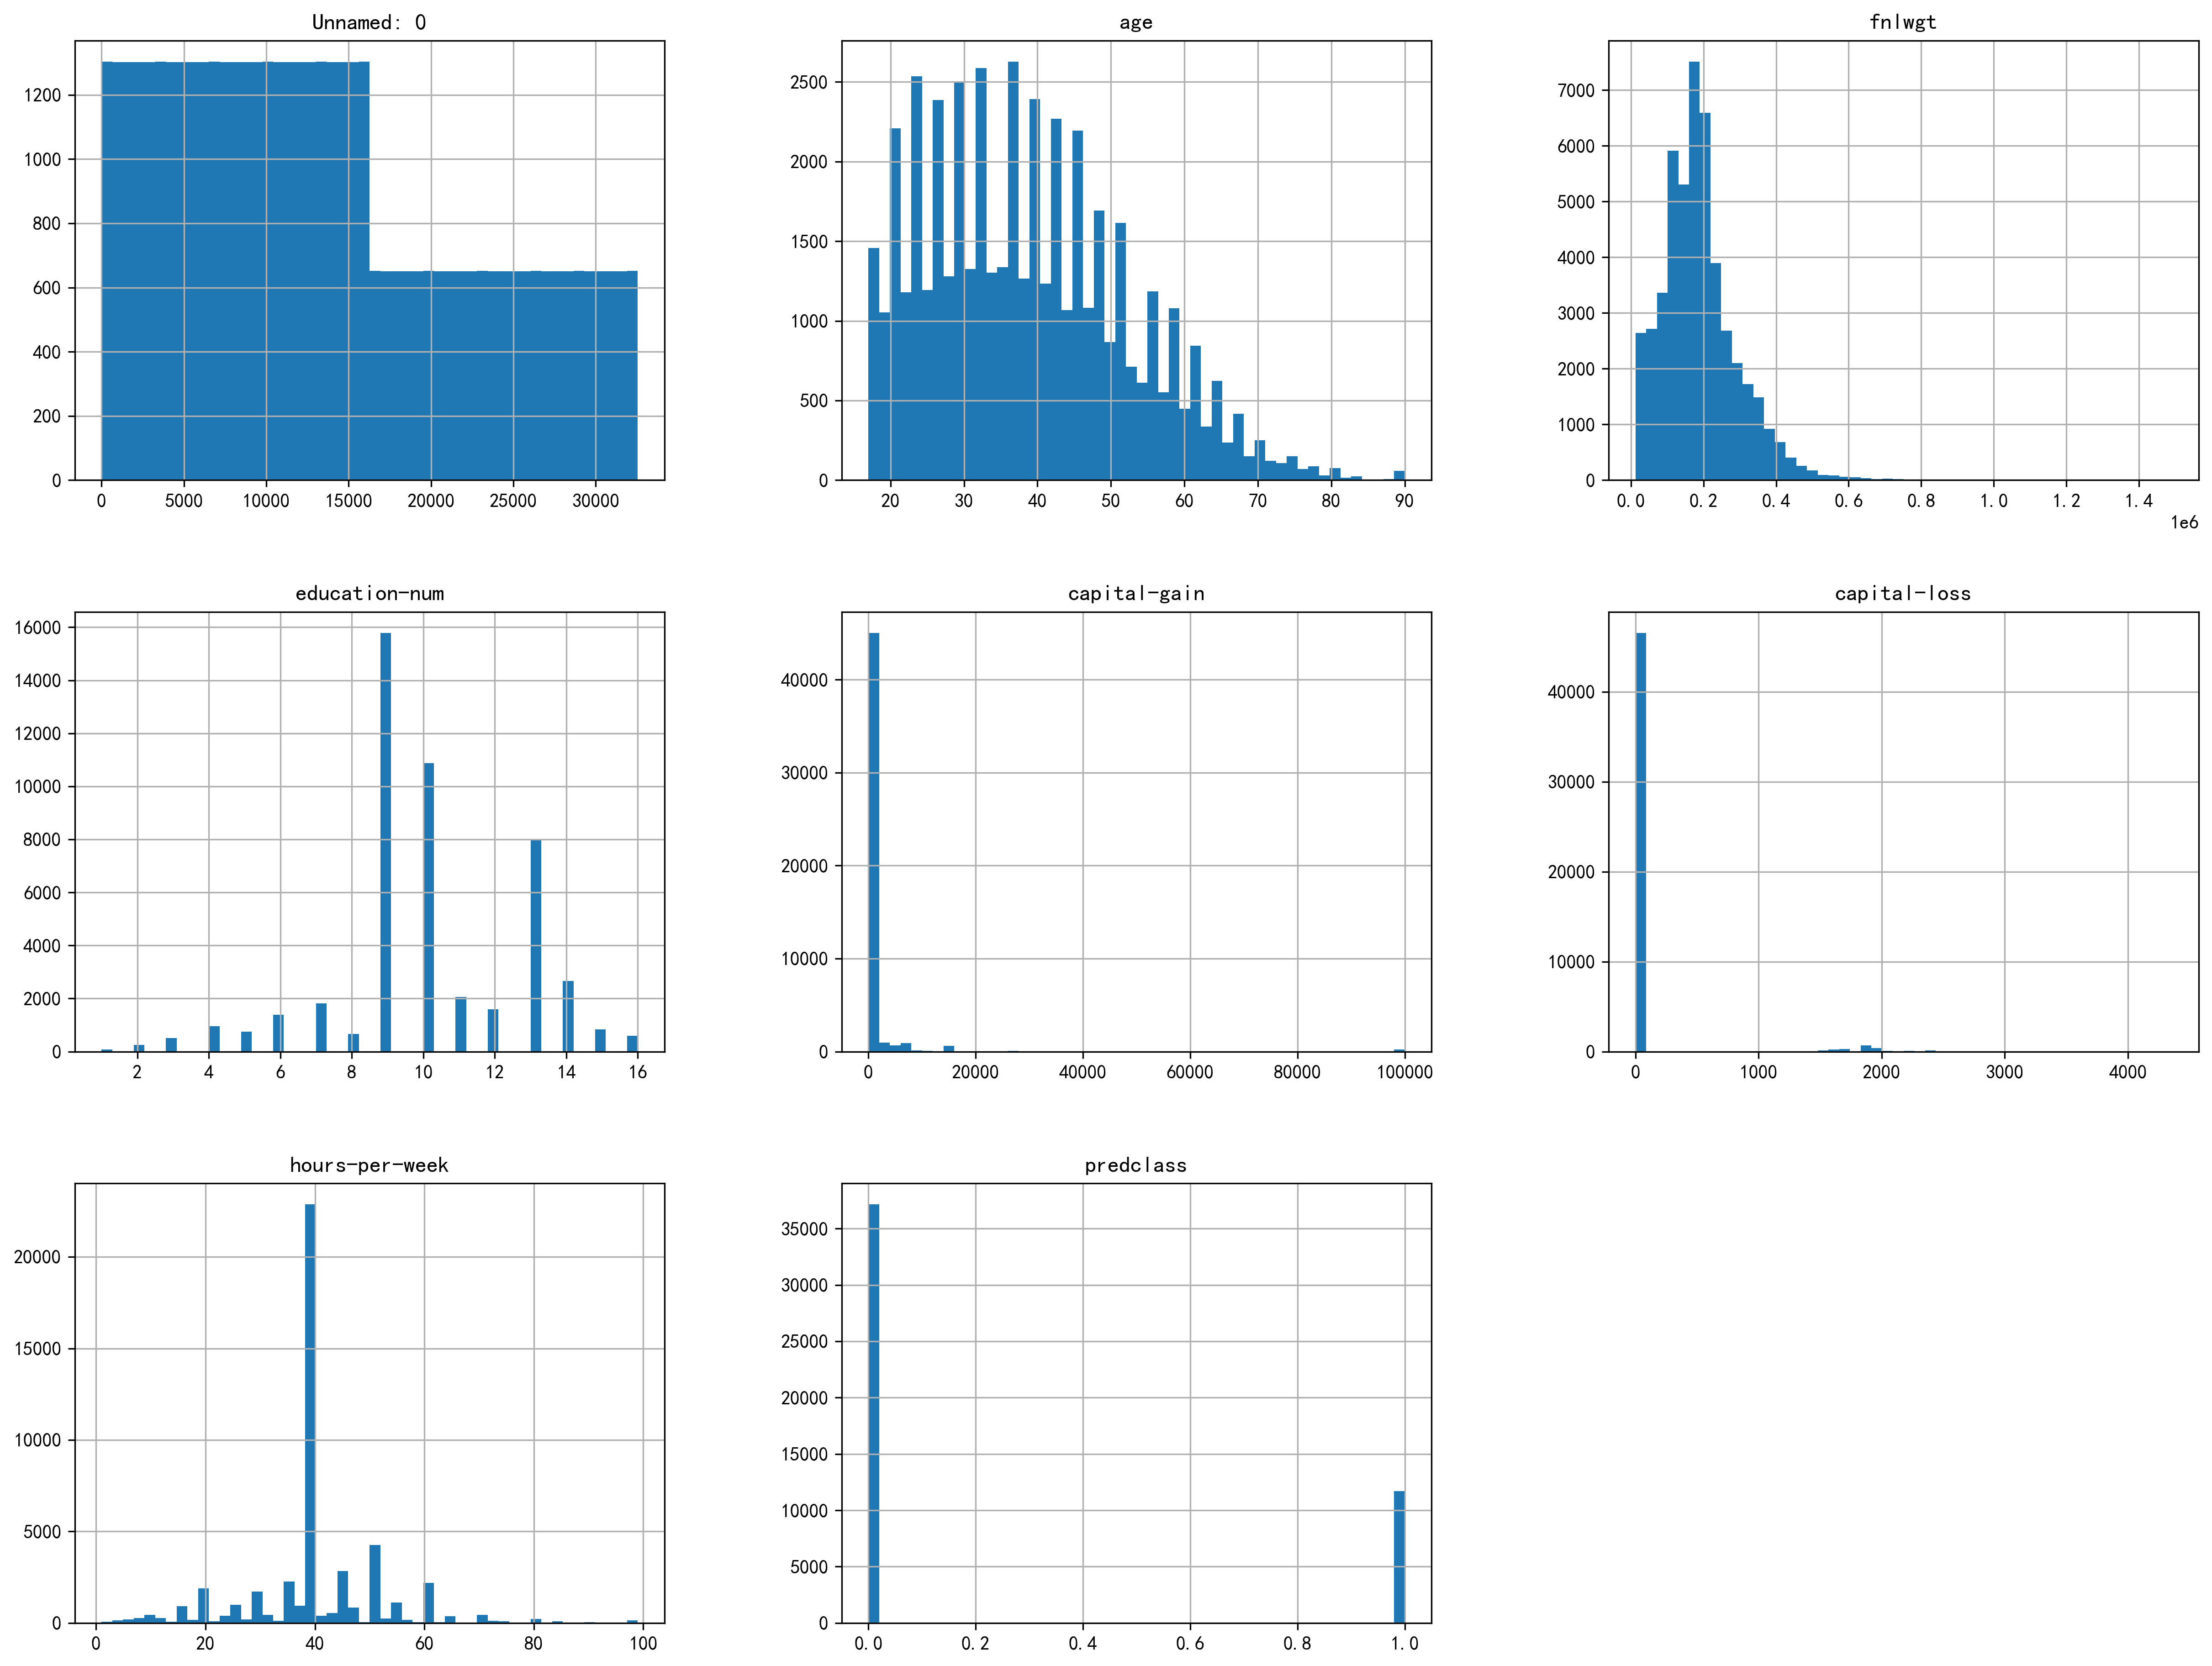

In [142]:
#查看每个特征的数据分布情况
df.hist(bins=50, figsize=(20,15))   # 绘制数据集 df 中数值型特征的直方图

In [143]:
#删除无关列
df.drop(['Unnamed: 0'], axis=1, inplace=True)

## 分类问题

In [12]:
# 特征列与目标列分离
X = df.drop('predclass', axis=1)
y = df['predclass']

In [13]:
# 特征编码（OrdinalEncoder）
cat_cols = X.select_dtypes(include=['object']).columns
encoder = OrdinalEncoder()
X[cat_cols] = encoder.fit_transform(X[cat_cols])

# 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [15]:
# 定义一个函数来绘制ROC曲线
def plot_roc_curve(fpr, tpr, roc_auc, model_name):
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver operating characteristic - {model_name}')
    plt.legend(loc="lower right")
    plt.show()


# 定义一个函数来绘制决策边界
def plot_decision_boundary(model, X_train_2d, y_train, featureA, featureB, x_min, x_max, y_min, y_max):
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    fig, ax = plt.subplots()
    contour = ax.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')
    scatter = ax.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, cmap='coolwarm', edgecolors='k')

    ax.set_xlabel(featureA)
    ax.set_ylabel(featureB)
    ax.set_title(f"Decision Boundary - {type(model).__name__}")

    plt.show()

### 随机森林

In [16]:
# 随机森林分类器
rf_clf = RandomForestClassifier(random_state=42, max_depth=10, min_samples_split=5, max_features='sqrt')

# 参数网格搜索--迭代器
param_grid_rf = {  
    'n_estimators': [50, 100, 200]
}
grid_search_rf = GridSearchCV(rf_clf, param_grid_rf, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

best_rf_clf = grid_search_rf.best_estimator_
y_pred_rf = best_rf_clf.predict(X_test)

# 随机森林模型评价
print("随机森林 - 测试集准确率:", accuracy_score(y_test, y_pred_rf))
print("随机森林 - 混淆矩阵:\n", confusion_matrix(y_test, y_pred_rf))
print("随机森林 - 分类报告:\n", classification_report(y_test, y_pred_rf))

随机森林 - 测试集准确率: 0.8567918927218753
随机森林 - 混淆矩阵:
 [[7119  295]
 [1104 1251]]
随机森林 - 分类报告:
               precision    recall  f1-score   support

           0       0.87      0.96      0.91      7414
           1       0.81      0.53      0.64      2355

    accuracy                           0.86      9769
   macro avg       0.84      0.75      0.78      9769
weighted avg       0.85      0.86      0.85      9769



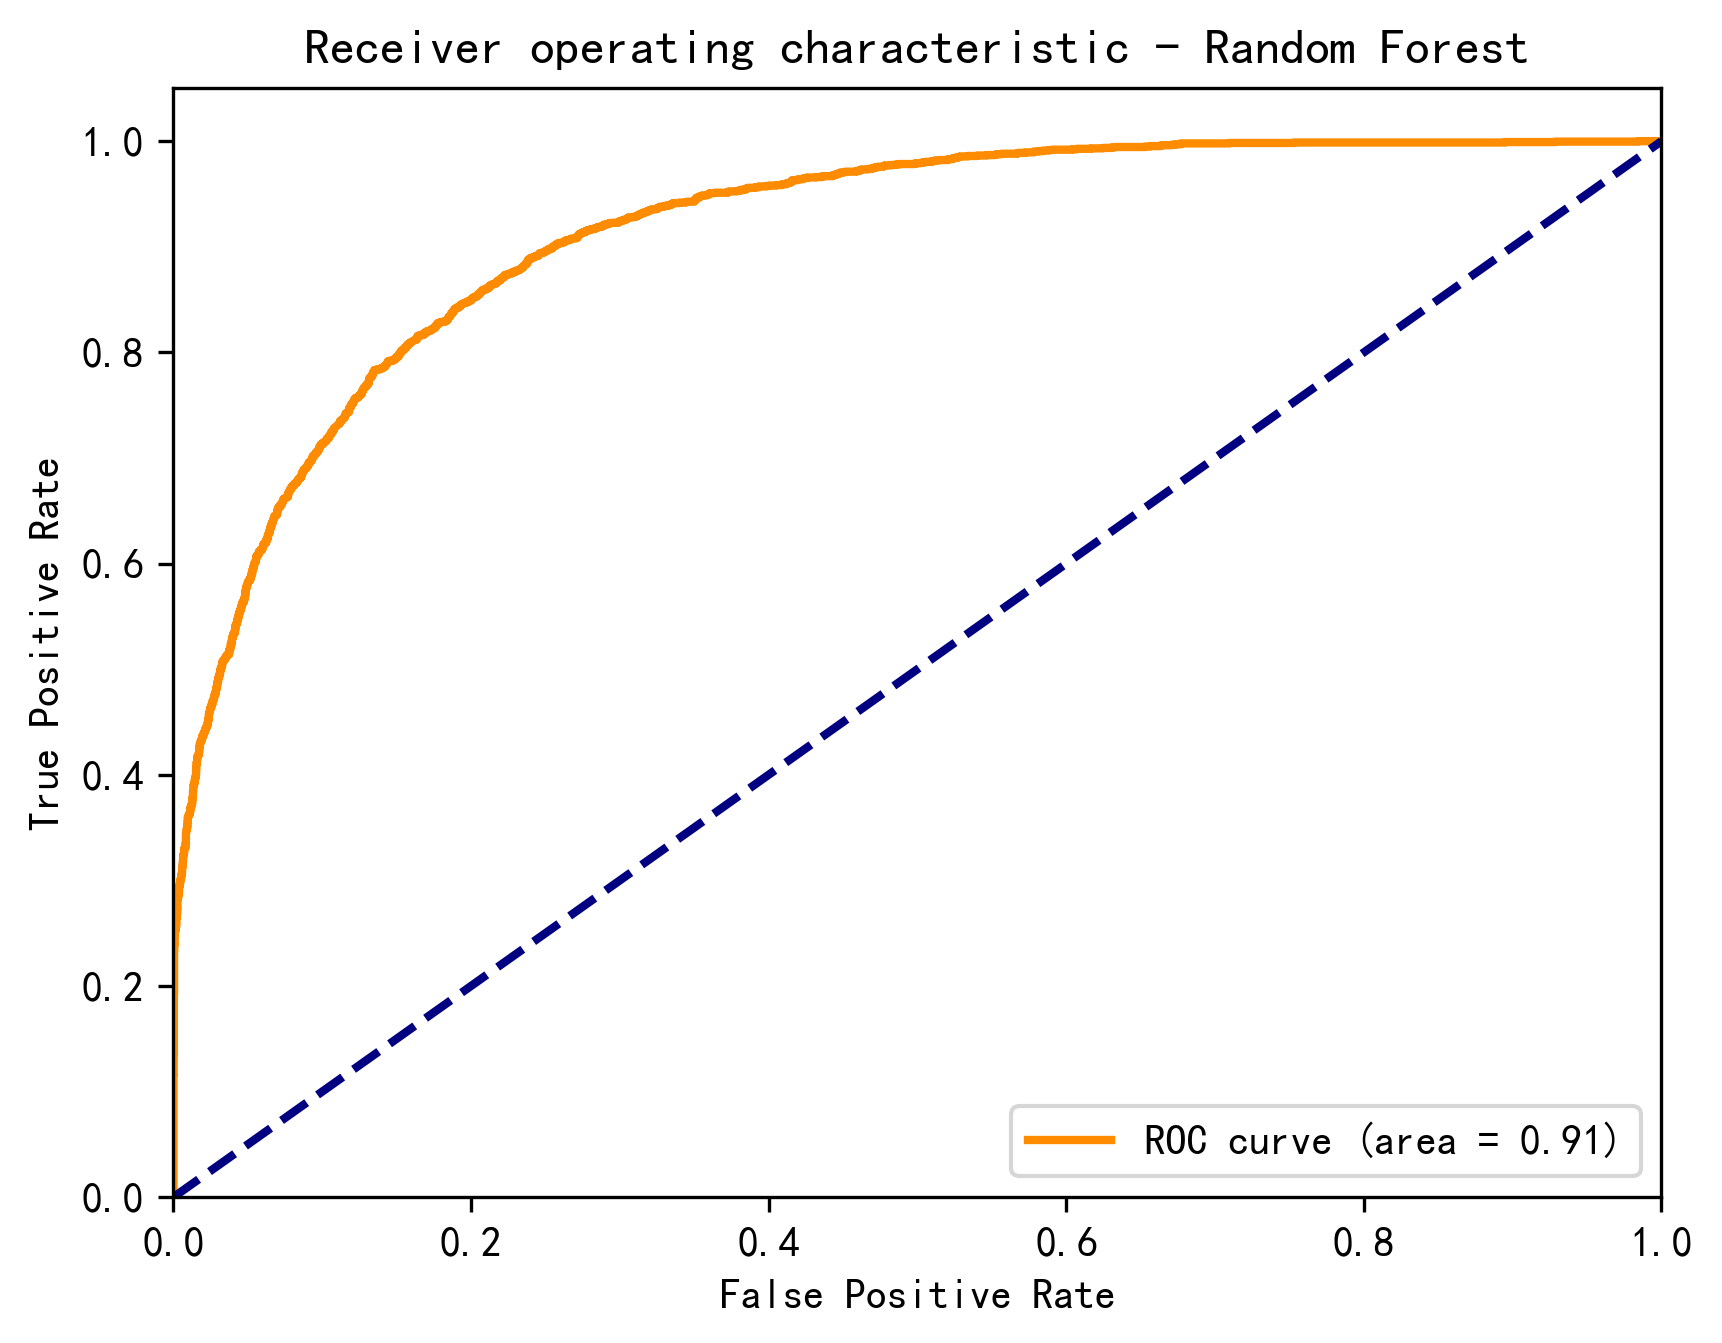

In [17]:
# 随机森林 - 计算ROC曲线相关数据
y_score_rf = best_rf_clf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_score_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plot_roc_curve(fpr_rf, tpr_rf, roc_auc_rf, 'Random Forest')

In [18]:
# 随机森林 - 获取特征重要性
feature_importance_rf = best_rf_clf.feature_importances_
features_rf = X.columns
sorted_idx_rf = np.argsort(feature_importance_rf)[::-1]

print("\n--- 随机森林 - Feature Importances ---")
for idx in sorted_idx_rf[:10]:
    print(f"{features_rf[idx]}: {feature_importance_rf[idx]}")


--- 随机森林 - Feature Importances ---
capital-gain: 0.22113164161285986
relationship: 0.18962376042026874
marital-status: 0.1464159684620978
education-num: 0.14081381807356375
age: 0.08168749360958649
capital-loss: 0.055978658723106325
education: 0.04212315054357985
hours-per-week: 0.04205508993682223
sex: 0.02590684271793423
occupation: 0.022203950330025233


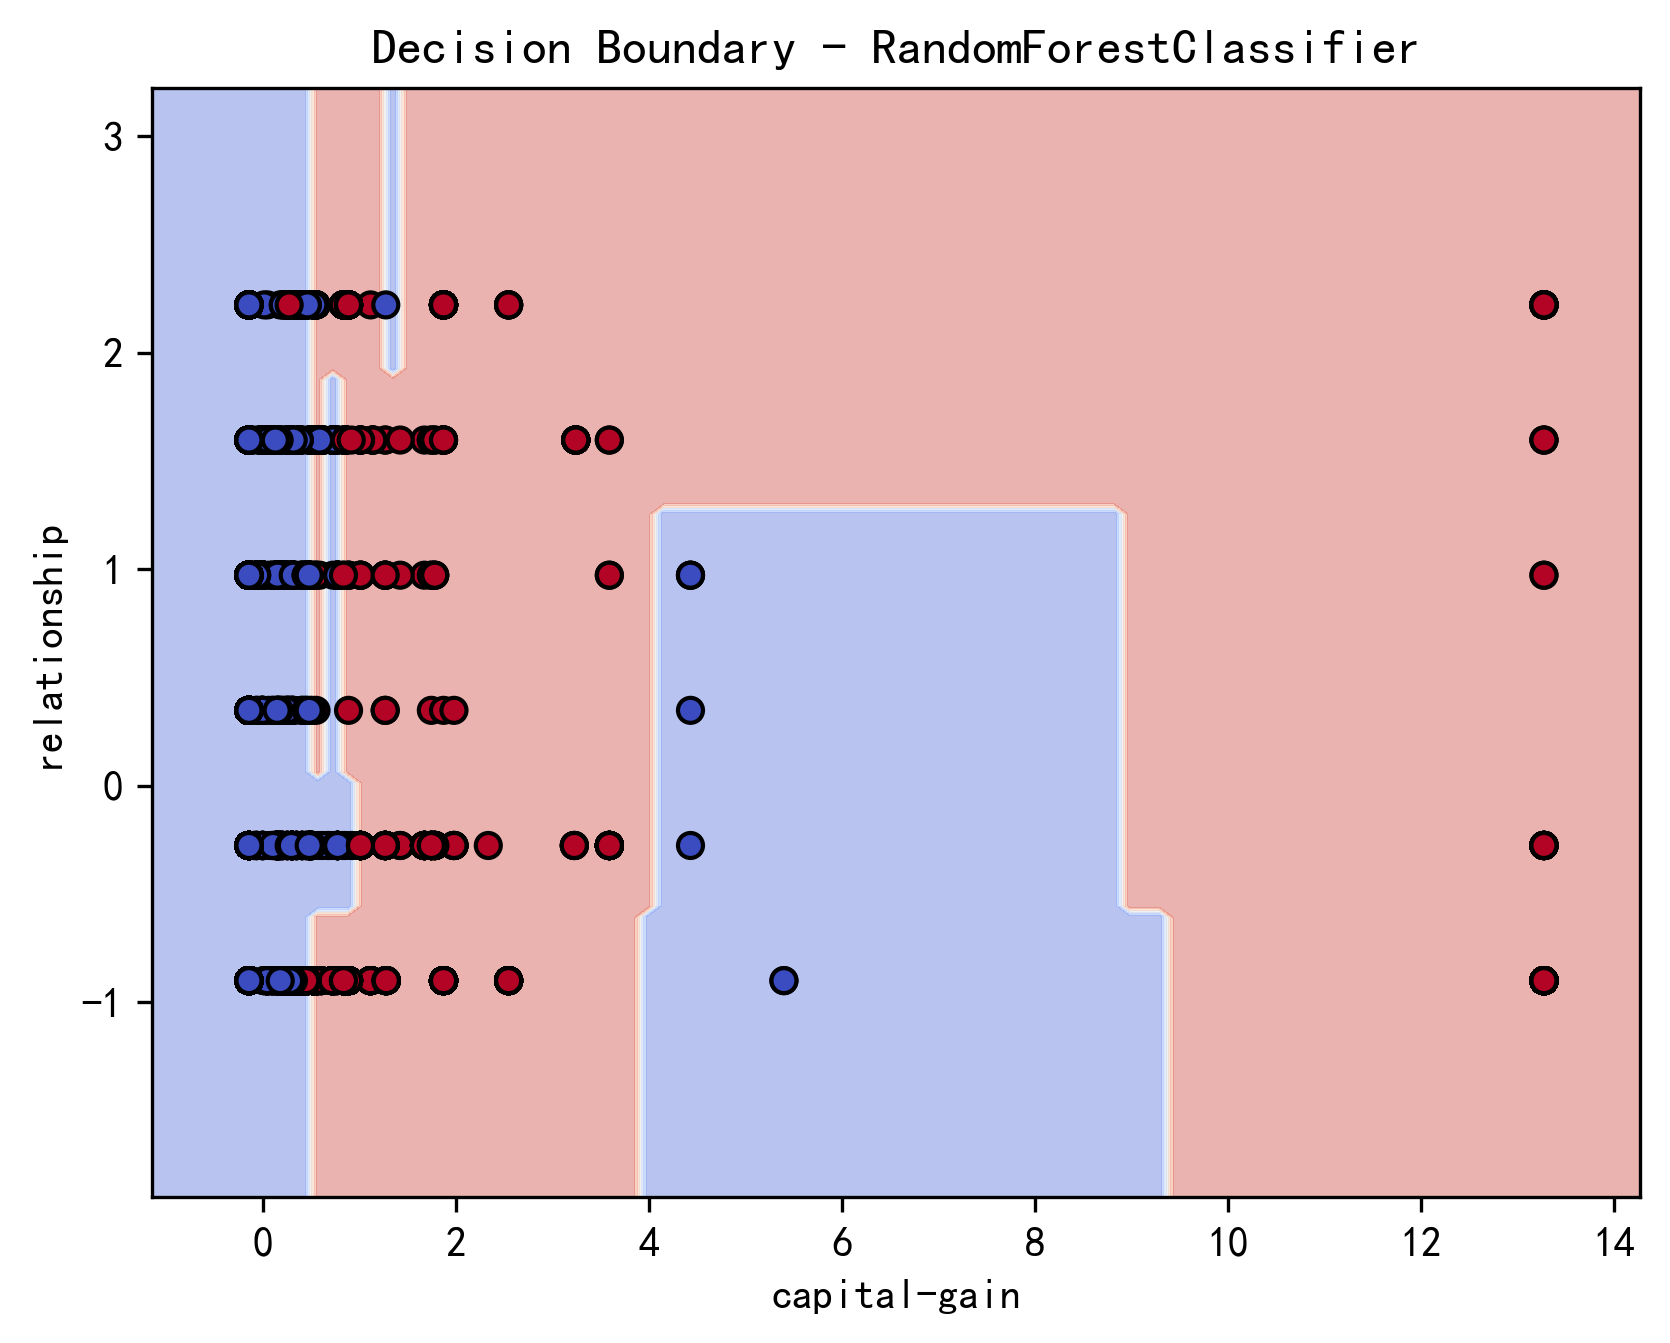

In [19]:
# 随机森林 - 选择两个最重要特征绘制决策边界
featureA_rf, featureB_rf = features_rf[sorted_idx_rf[0]], features_rf[sorted_idx_rf[1]]
X_train_2d_rf = X_train[:, [sorted_idx_rf[0], sorted_idx_rf[1]]]
X_test_2d_rf = X_test[:, [sorted_idx_rf[0], sorted_idx_rf[1]]]

x_min_rf, x_max_rf = X_train_2d_rf[:, 0].min() - 1, X_train_2d_rf[:, 0].max() + 1
y_min_rf, y_max_rf = X_train_2d_rf[:, 1].min() - 1, X_train_2d_rf[:, 1].max() + 1

rf_clf_2d = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10, min_samples_split=5)
rf_clf_2d.fit(X_train_2d_rf, y_train)
plot_decision_boundary(rf_clf_2d, X_train_2d_rf, y_train, featureA_rf, featureB_rf, x_min_rf, x_max_rf, y_min_rf, y_max_rf)

### 逻辑回归

In [20]:
# 逻辑回归分类器
lr_clf = LogisticRegression(random_state=42)

# 参数网格搜索-正则化强度
param_grid_lr = {
    'C': [0.1, 1, 10]
}
grid_search_lr = GridSearchCV(lr_clf, param_grid_lr, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_lr.fit(X_train, y_train)

best_lr_clf = grid_search_lr.best_estimator_
y_pred_lr = best_lr_clf.predict(X_test)

# 逻辑回归模型评价
print("逻辑回归 - 测试集准确率:", accuracy_score(y_test, y_pred_lr))
print("逻辑回归 - 混淆矩阵:\n", confusion_matrix(y_test, y_pred_lr))
print("逻辑回归 - 分类报告:\n", classification_report(y_test, y_pred_lr))

逻辑回归 - 测试集准确率: 0.8245470365441704
逻辑回归 - 混淆矩阵:
 [[7011  403]
 [1311 1044]]
逻辑回归 - 分类报告:
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      7414
           1       0.72      0.44      0.55      2355

    accuracy                           0.82      9769
   macro avg       0.78      0.69      0.72      9769
weighted avg       0.81      0.82      0.81      9769



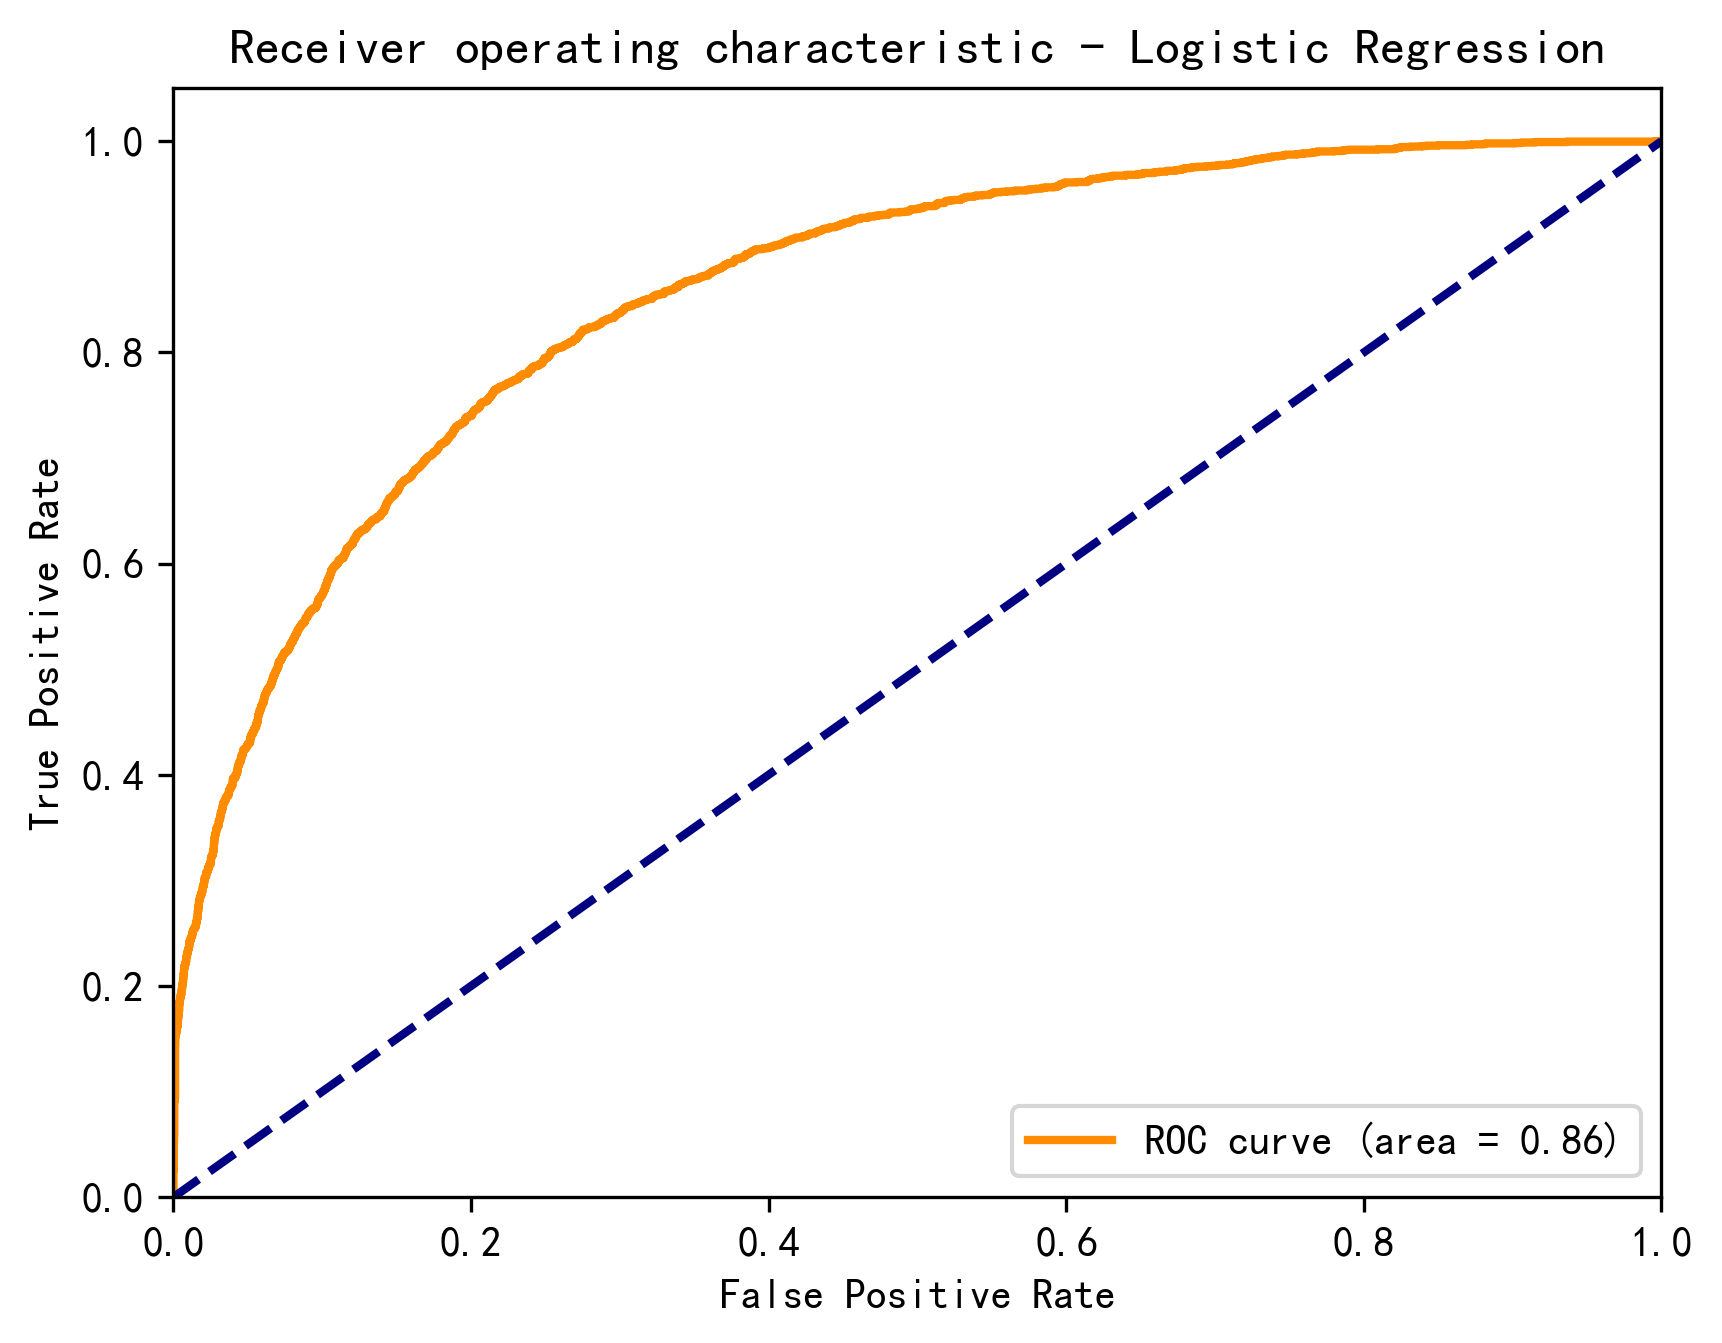

In [21]:
# 逻辑回归 - 计算ROC曲线相关数据
y_score_lr = best_lr_clf.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_score_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)
plot_roc_curve(fpr_lr, tpr_lr, roc_auc_lr, 'Logistic Regression')

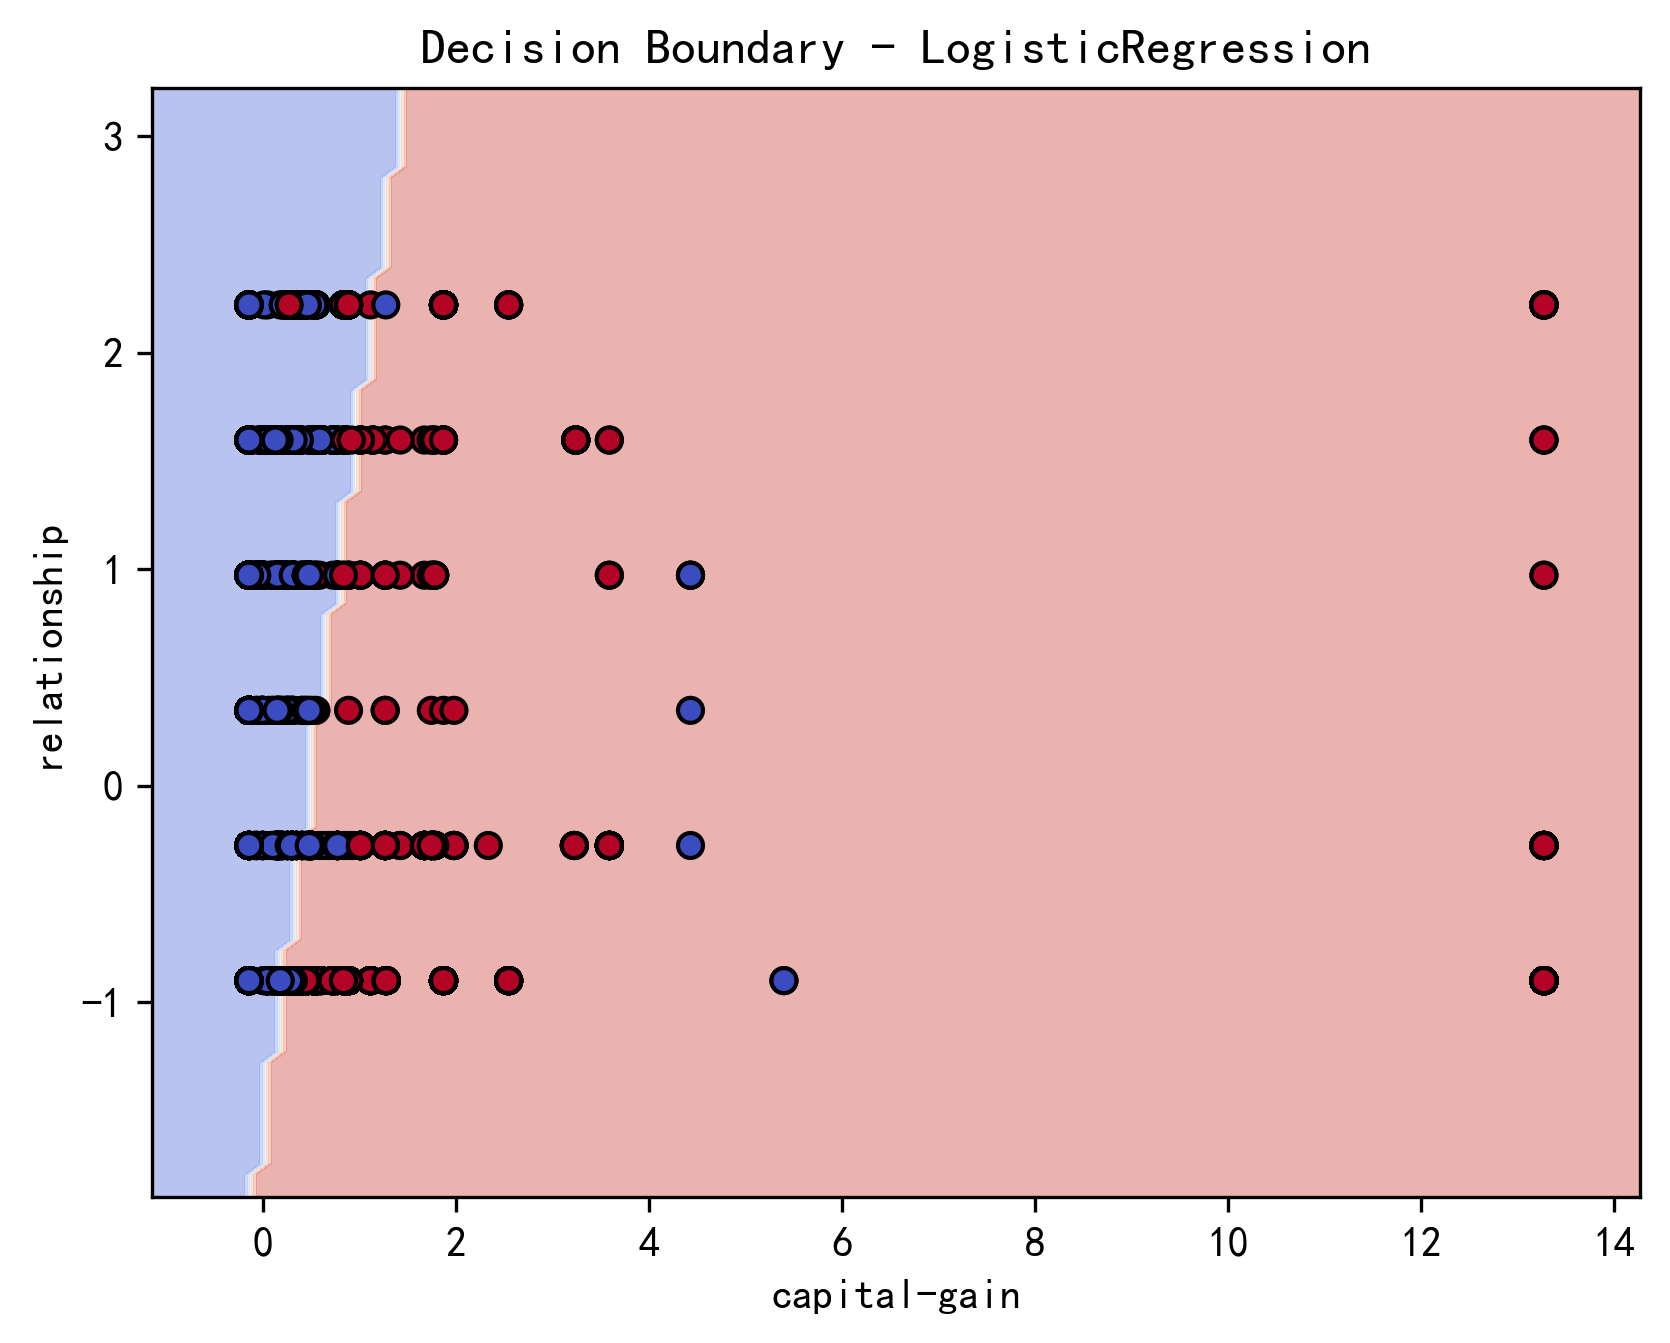

In [22]:
# 逻辑回归 - 选择两个最重要特征绘制决策边界
X_train_2d_lr = X_train[:, [sorted_idx_rf[0], sorted_idx_rf[1]]]
X_test_2d_lr = X_test[:, [sorted_idx_rf[0], sorted_idx_rf[1]]]

x_min_lr, x_max_lr = X_train_2d_lr[:, 0].min() - 1, X_train_2d_lr[:, 0].max() + 1
y_min_lr, y_max_lr = X_train_2d_lr[:, 1].min() - 1, X_train_2d_lr[:, 1].max() + 1

lr_clf_2d = LogisticRegression(random_state=42)
lr_clf_2d.fit(X_train_2d_lr, y_train)
plot_decision_boundary(lr_clf_2d, X_train_2d_lr, y_train, featureA_rf, featureB_rf, x_min_lr, x_max_lr, y_min_lr, y_max_lr)

### 支持向量机

In [23]:
# 支持向量机分类器
svm_clf = SVC(random_state=42, probability=True)

# 参数网格搜索-正则化强度和核函数
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear','rbf']
}
grid_search_svm = GridSearchCV(svm_clf, param_grid_svm, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_svm.fit(X_train, y_train)

best_svm_clf = grid_search_svm.best_estimator_
y_pred_svm = best_svm_clf.predict(X_test)

# 支持向量机模型评价
print("支持向量机 - 测试集准确率:", accuracy_score(y_test, y_pred_svm))
print("支持向量机 - 混淆矩阵:\n", confusion_matrix(y_test, y_pred_svm))
print("支持向量机 - 分类报告:\n", classification_report(y_test, y_pred_svm))

支持向量机 - 测试集准确率: 0.8468625243115979
支持向量机 - 混淆矩阵:
 [[7013  401]
 [1095 1260]]
支持向量机 - 分类报告:
               precision    recall  f1-score   support

           0       0.86      0.95      0.90      7414
           1       0.76      0.54      0.63      2355

    accuracy                           0.85      9769
   macro avg       0.81      0.74      0.77      9769
weighted avg       0.84      0.85      0.84      9769



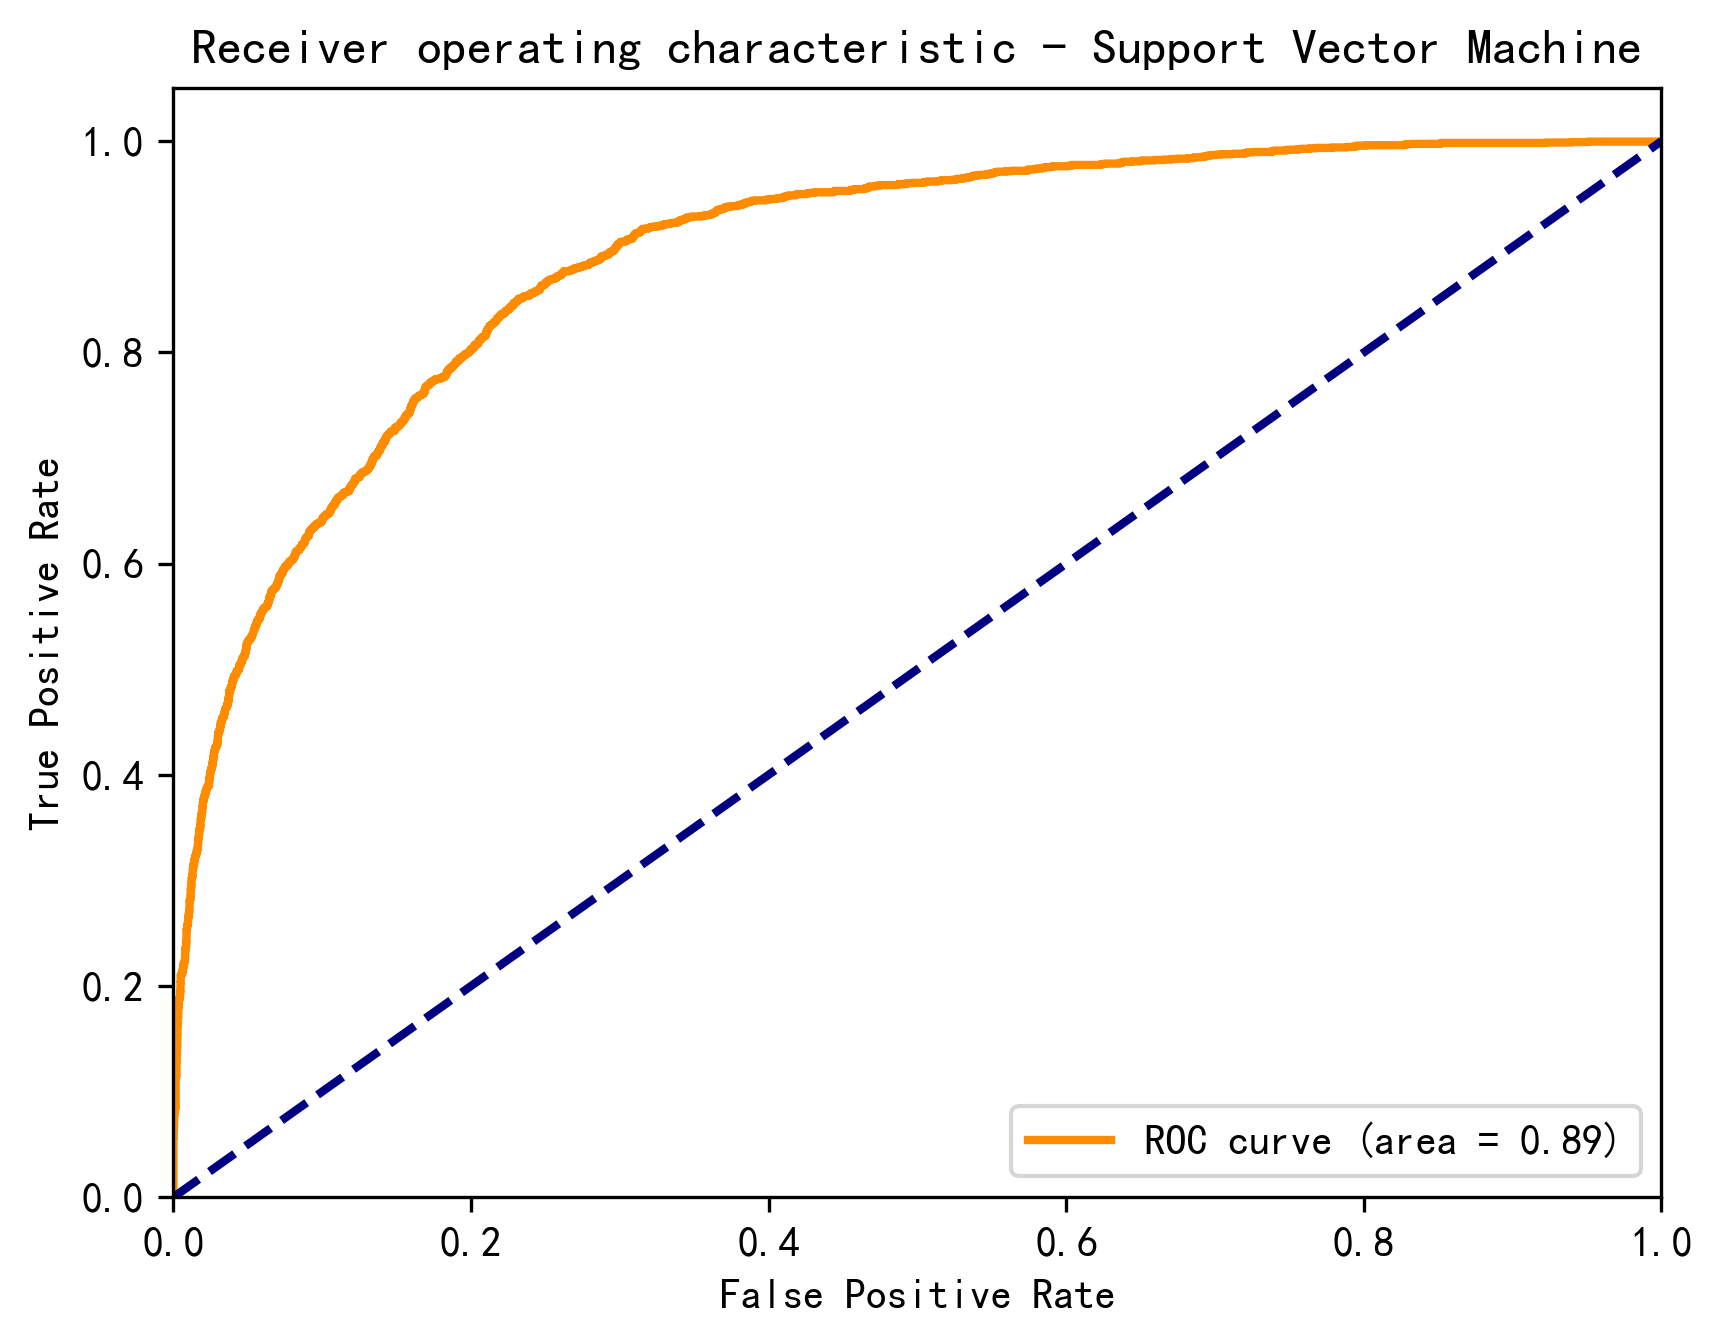

In [24]:
# 支持向量机 - 计算ROC曲线相关数据
y_score_svm = best_svm_clf.predict_proba(X_test)[:, 1]
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_score_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)
plot_roc_curve(fpr_svm, tpr_svm, roc_auc_svm, 'Support Vector Machine')

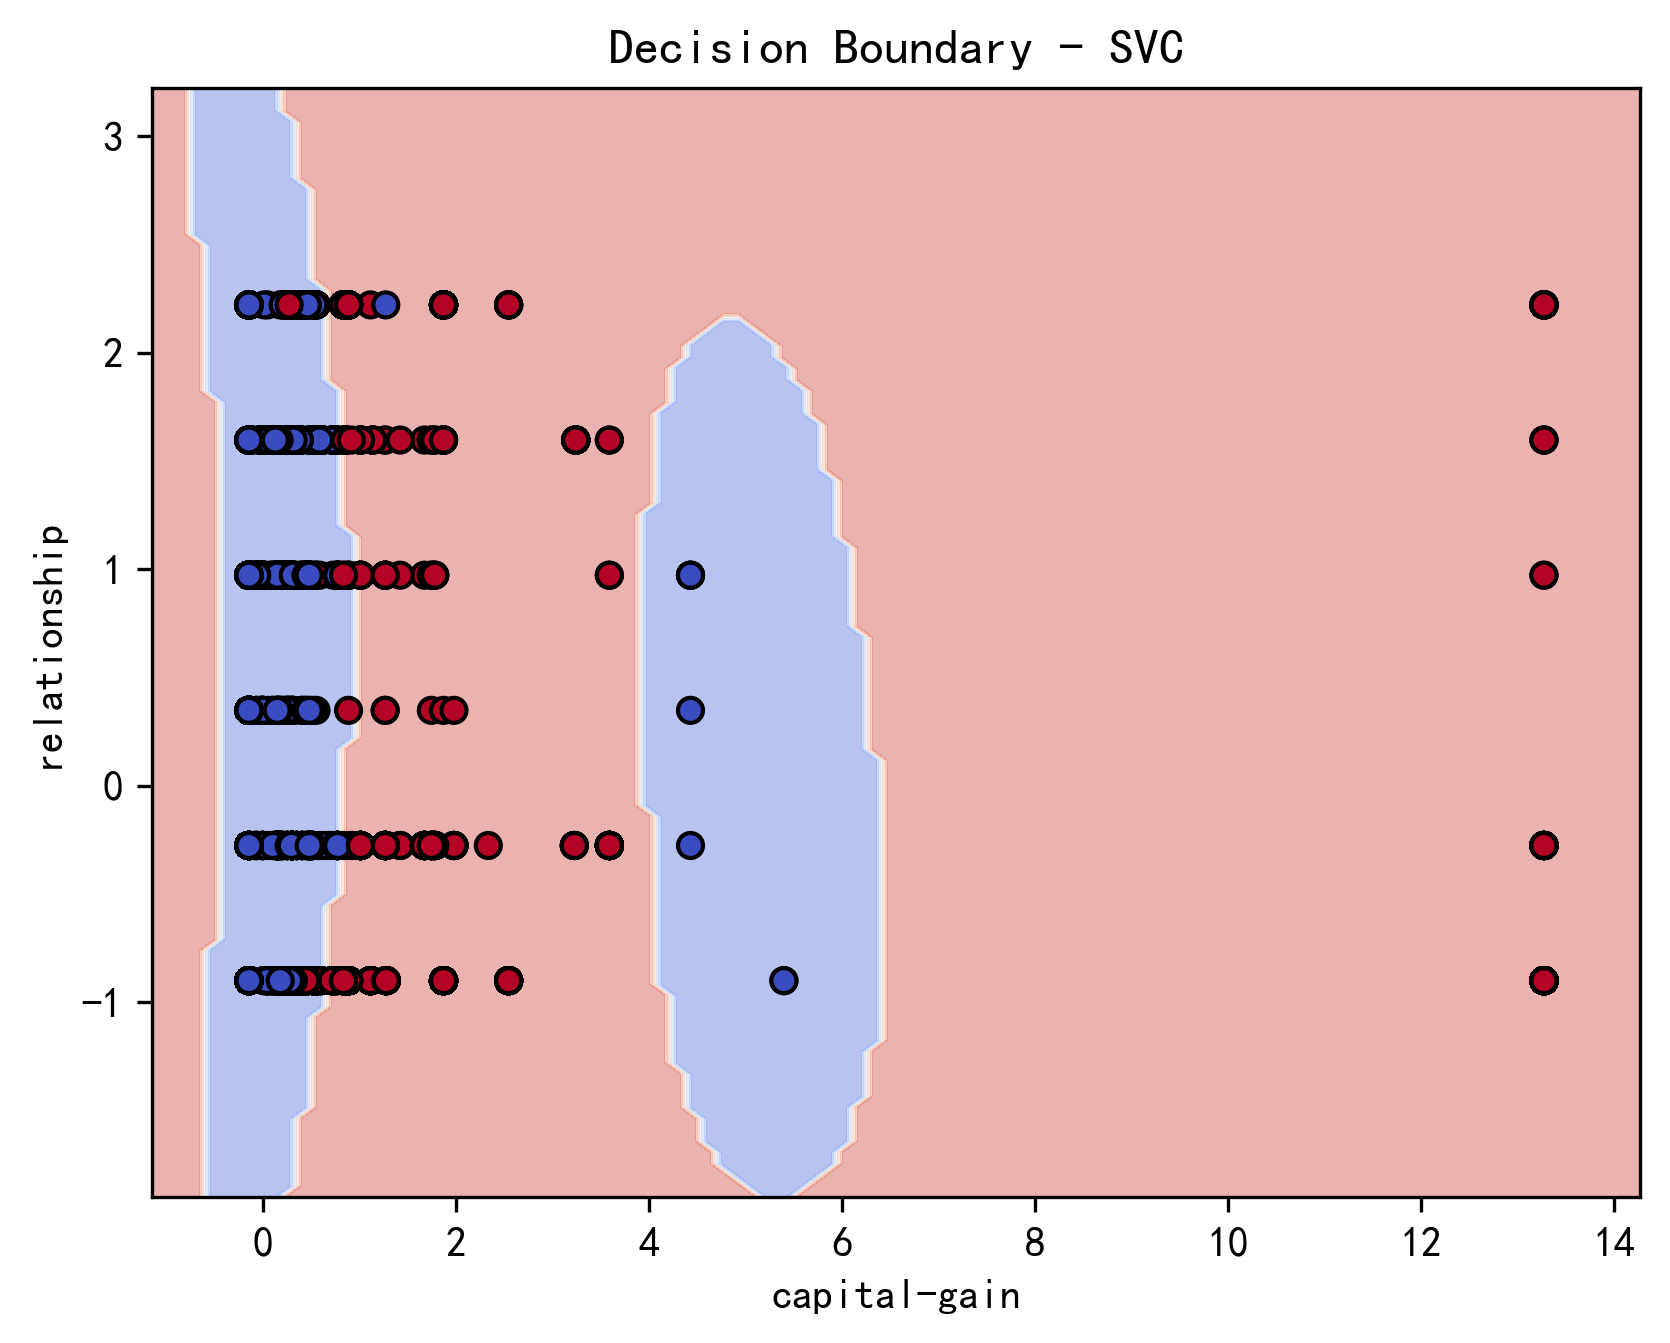

In [25]:
# 支持向量机 - 选择两个最重要特征绘制决策边界
X_train_2d_svm = X_train[:, [sorted_idx_rf[0], sorted_idx_rf[1]]]
X_test_2d_svm = X_test[:, [sorted_idx_rf[0], sorted_idx_rf[1]]]

x_min_svm, x_max_svm = X_train_2d_svm[:, 0].min() - 1, X_train_2d_svm[:, 0].max() + 1
y_min_svm, y_max_svm = X_train_2d_svm[:, 1].min() - 1, X_train_2d_svm[:, 1].max() + 1

svm_clf_2d = SVC(random_state=42, probability=True)
svm_clf_2d.fit(X_train_2d_svm, y_train)
plot_decision_boundary(svm_clf_2d, X_train_2d_svm, y_train, featureA_rf, featureB_rf, x_min_svm, x_max_svm, y_min_svm, y_max_svm)

## 使用权重列——把fnlwgt当作权重列

随机森林 - 测试集准确率: 0.8603746545193981
随机森林 - 混淆矩阵:
 [[7086  328]
 [1036 1319]]
随机森林 - 分类报告:
               precision    recall  f1-score   support

           0       0.87      0.96      0.91      7414
           1       0.80      0.56      0.66      2355

    accuracy                           0.86      9769
   macro avg       0.84      0.76      0.79      9769
weighted avg       0.86      0.86      0.85      9769



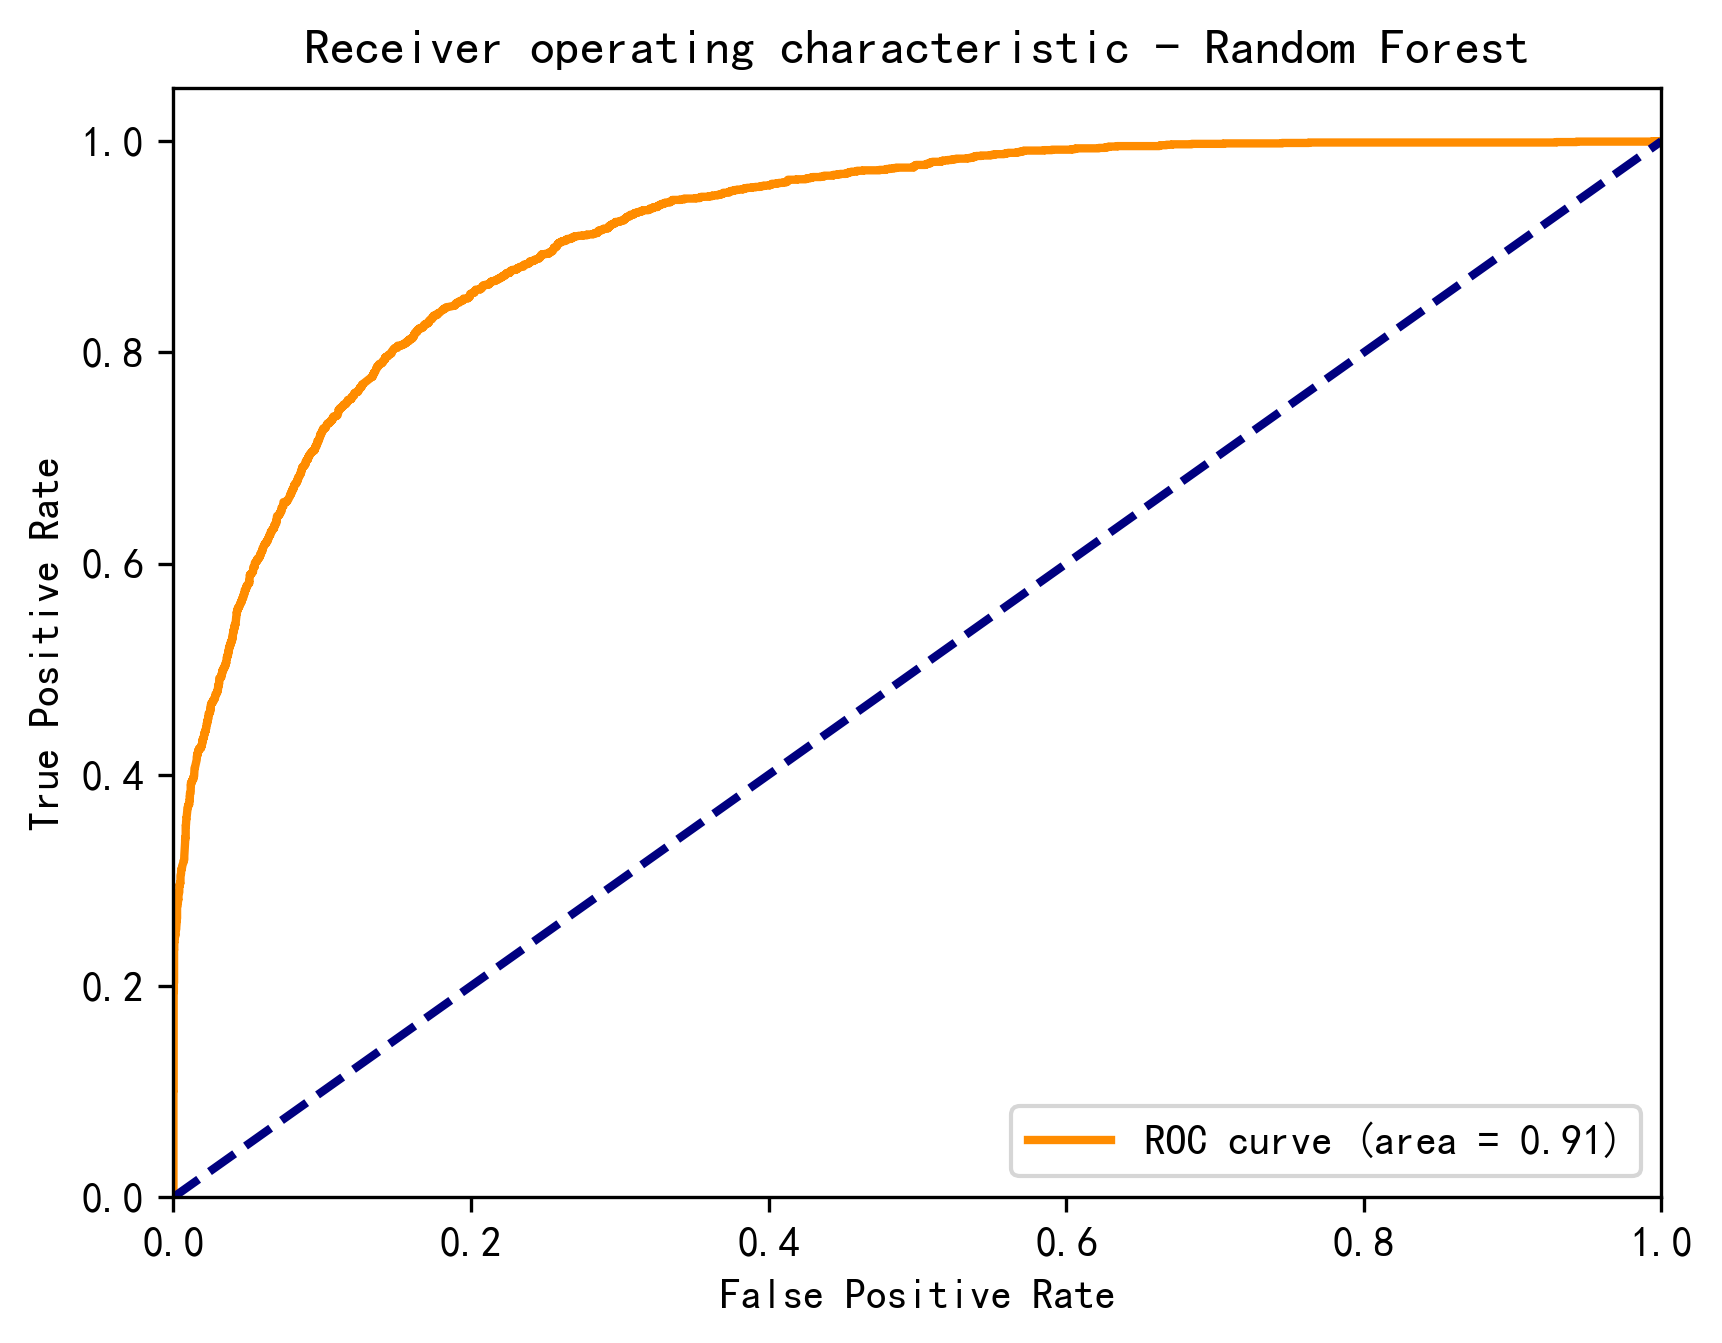


--- 随机森林 - Feature Importances ---
relationship: 0.233474456999246
capital-gain: 0.1950981004816951
education-num: 0.1572196404703478
marital-status: 0.15295206011288603
age: 0.06942818810211512
capital-loss: 0.049801125990850646
hours-per-week: 0.045467198389668936
education: 0.04519187043942761
occupation: 0.022883022523051733
workclass: 0.011750582305694353


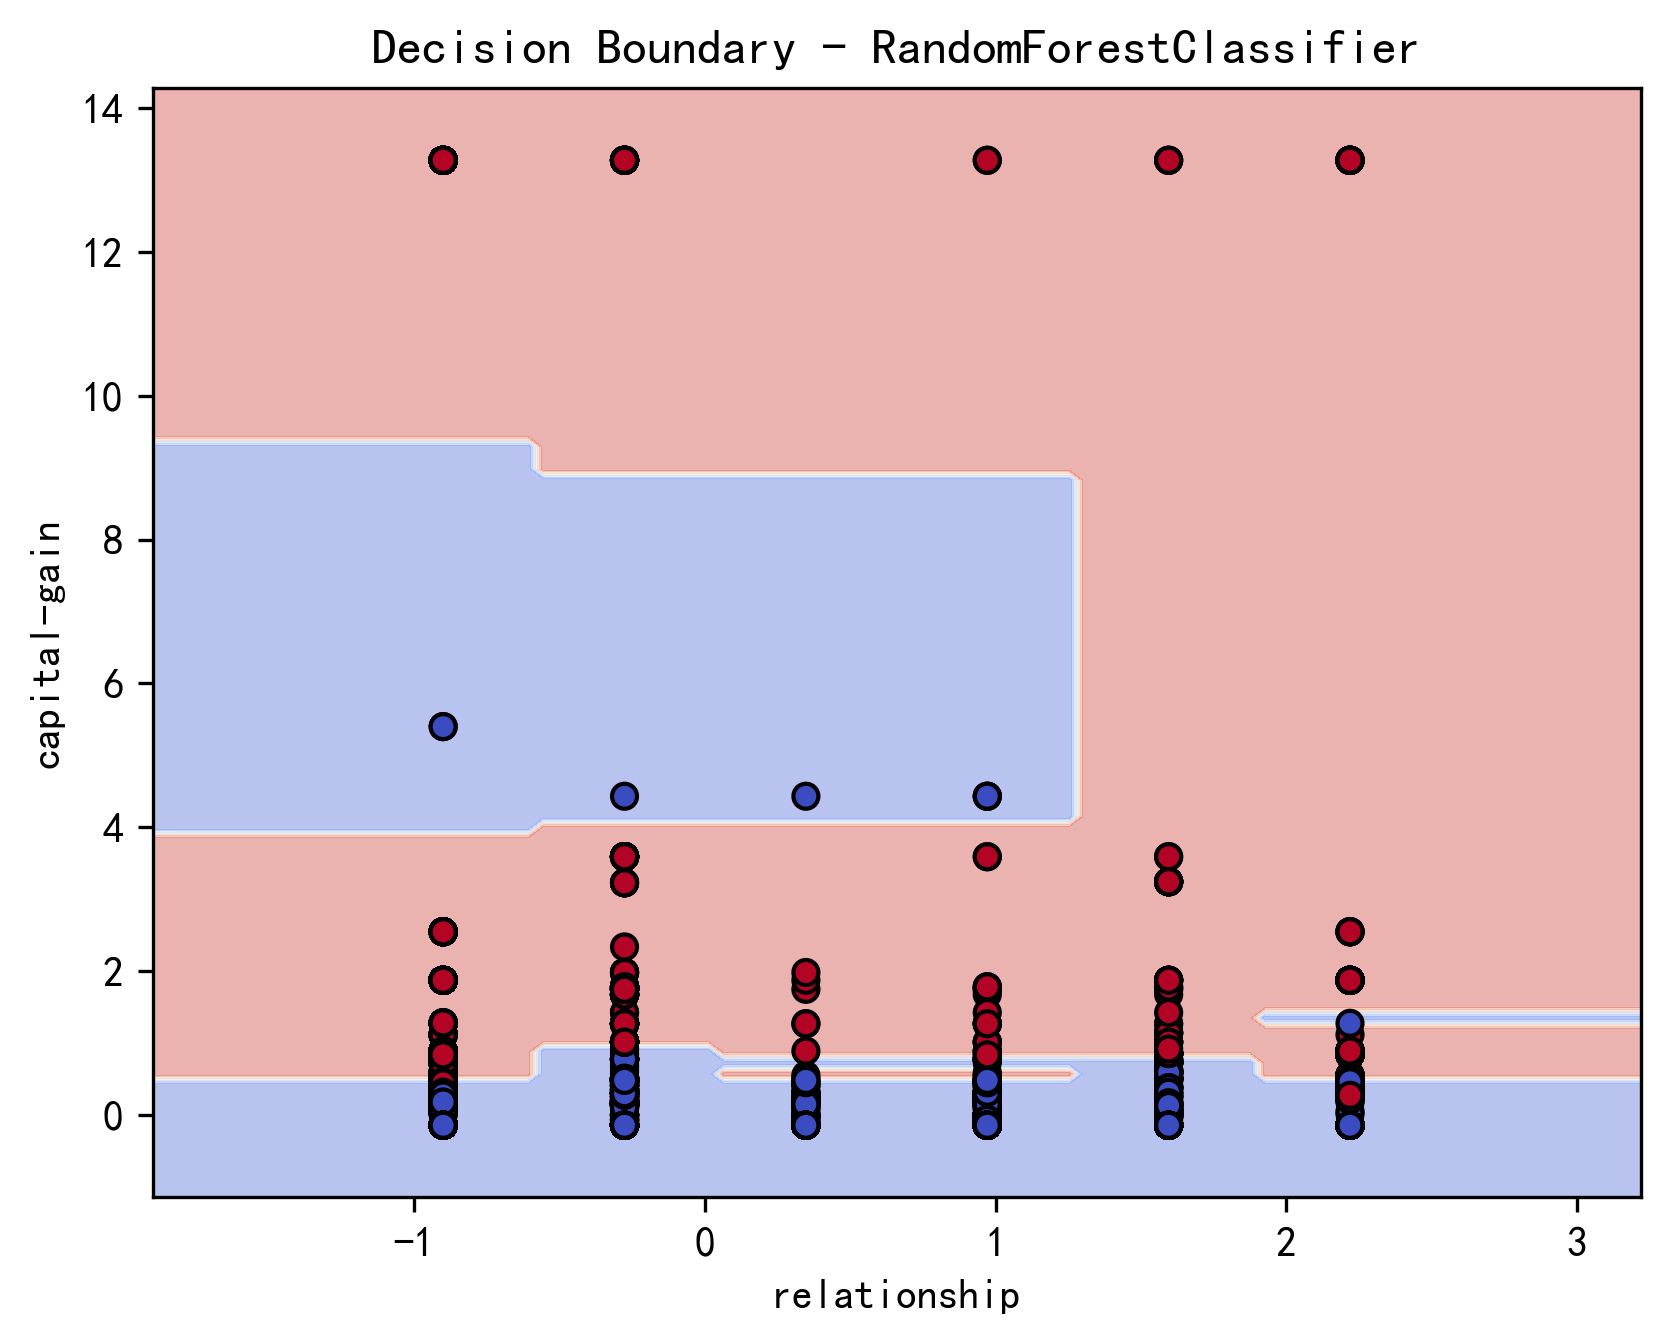

In [26]:
# 提取特征、目标变量和权重列
X = df.drop(['predclass', 'fnlwgt'], axis=1)
y = df['predclass']
weights = df['fnlwgt']

# 特征编码（OrdinalEncoder）
cat_cols = X.select_dtypes(include=['object']).columns
encoder = OrdinalEncoder()
X[cat_cols] = encoder.fit_transform(X[cat_cols])

# 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 划分训练集和测试集（包含权重）
X_train, X_test, y_train, y_test, weights_train, weights_test = train_test_split(X_scaled, y, weights, test_size=0.2, random_state=42)

# 随机森林分类器
rf_clf = RandomForestClassifier(random_state=42, max_depth=10, min_samples_split=5, max_features='sqrt')

# 参数网格搜索
param_grid_rf = {'n_estimators': [50, 100, 200]}
grid_search_rf = GridSearchCV(rf_clf, param_grid_rf, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train, y_train, sample_weight=weights_train)

best_rf_clf = grid_search_rf.best_estimator_
y_pred_rf = best_rf_clf.predict(X_test)

# 随机森林模型评价
print("随机森林 - 测试集准确率:", accuracy_score(y_test, y_pred_rf))
print("随机森林 - 混淆矩阵:\n", confusion_matrix(y_test, y_pred_rf))
print("随机森林 - 分类报告:\n", classification_report(y_test, y_pred_rf))

# 随机森林 - 计算ROC曲线相关数据
y_score_rf = best_rf_clf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_score_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plot_roc_curve(fpr_rf, tpr_rf, roc_auc_rf, 'Random Forest')

# 随机森林 - 获取特征重要性
feature_importance_rf = best_rf_clf.feature_importances_
features_rf = X.columns
sorted_idx_rf = np.argsort(feature_importance_rf)[::-1]

print("\n--- 随机森林 - Feature Importances ---")
for idx in sorted_idx_rf[:10]:
    print(f"{features_rf[idx]}: {feature_importance_rf[idx]}")

# 随机森林 - 选择两个最重要特征绘制决策边界
featureA_rf, featureB_rf = features_rf[sorted_idx_rf[0]], features_rf[sorted_idx_rf[1]]
X_train_2d_rf = X_train[:, [sorted_idx_rf[0], sorted_idx_rf[1]]]
X_test_2d_rf = X_test[:, [sorted_idx_rf[0], sorted_idx_rf[1]]]

x_min_rf, x_max_rf = X_train_2d_rf[:, 0].min() - 1, X_train_2d_rf[:, 0].max() + 1
y_min_rf, y_max_rf = X_train_2d_rf[:, 1].min() - 1, X_train_2d_rf[:, 1].max() + 1

rf_clf_2d = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10, min_samples_split=5)
# 传递原始的权重数组
rf_clf_2d.fit(X_train_2d_rf, y_train, sample_weight=weights_train)
plot_decision_boundary(rf_clf_2d, X_train_2d_rf, y_train, featureA_rf, featureB_rf, x_min_rf, x_max_rf, y_min_rf, y_max_rf)

逻辑回归 - 测试集准确率: 0.8248541304125294
逻辑回归 - 混淆矩阵:
 [[6984  430]
 [1281 1074]]
逻辑回归 - 分类报告:
               precision    recall  f1-score   support

           0       0.85      0.94      0.89      7414
           1       0.71      0.46      0.56      2355

    accuracy                           0.82      9769
   macro avg       0.78      0.70      0.72      9769
weighted avg       0.81      0.82      0.81      9769



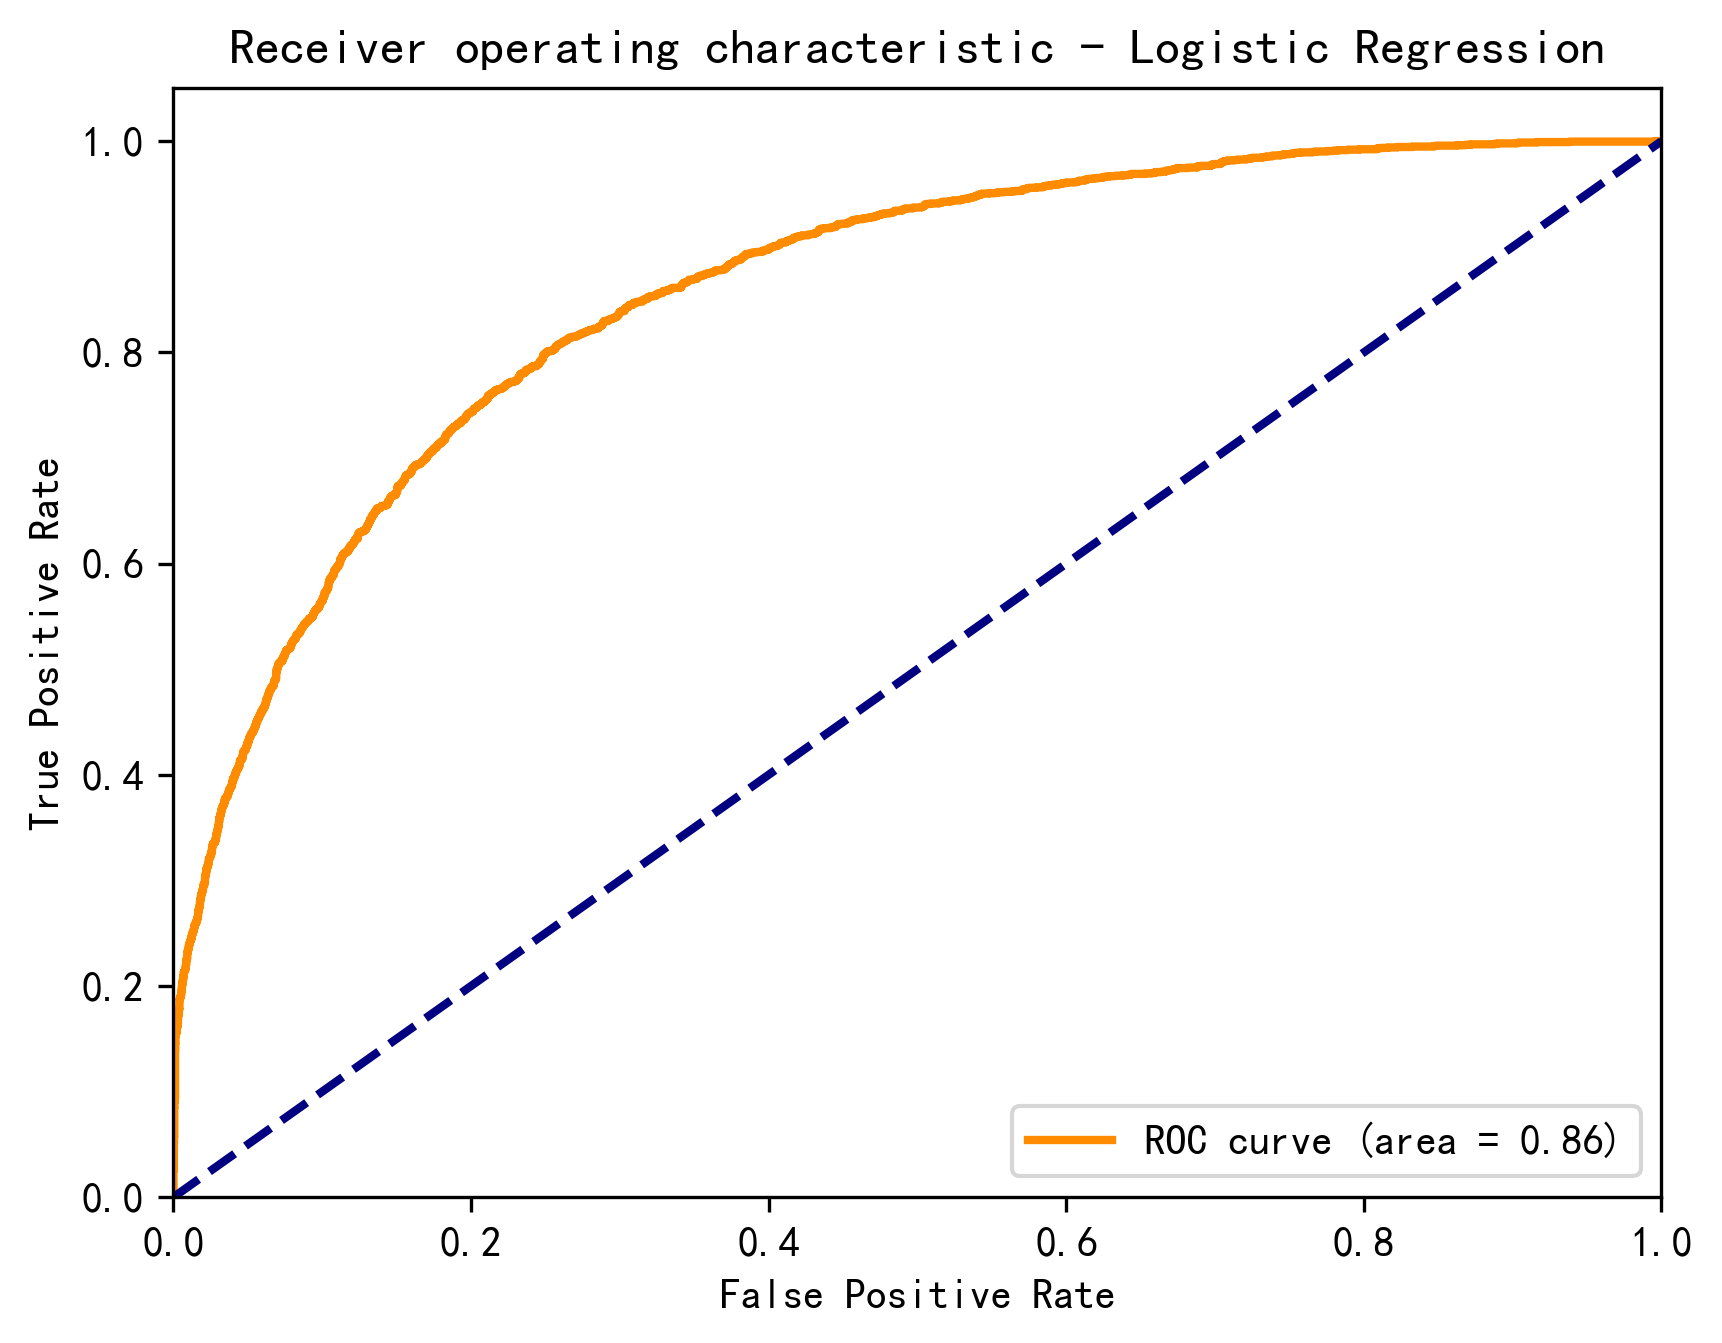

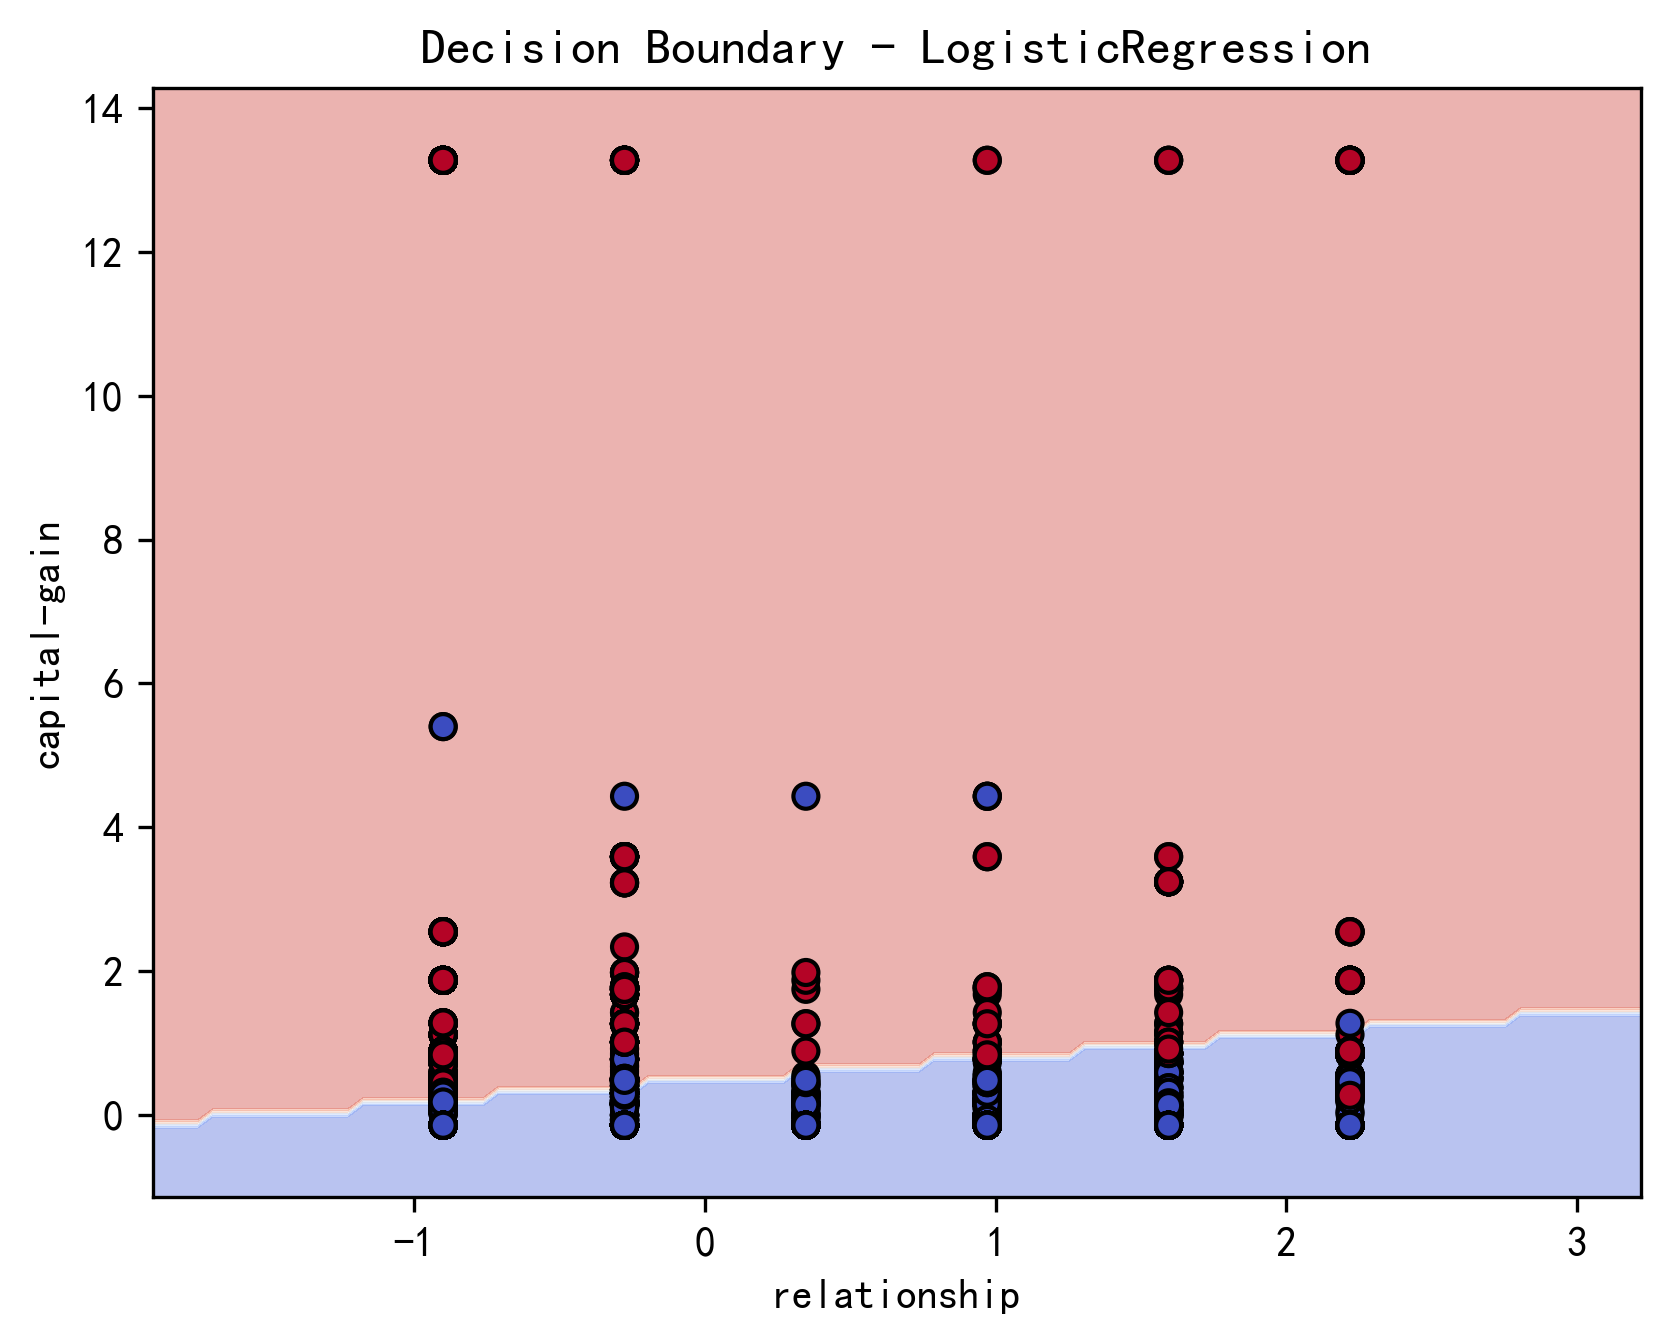

In [27]:
# 逻辑回归分类器
lr_clf = LogisticRegression(random_state=42)

# 参数网格搜索
param_grid_lr = {'C': [0.1, 1, 10]}
grid_search_lr = GridSearchCV(lr_clf, param_grid_lr, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_lr.fit(X_train, y_train, sample_weight=weights_train)

best_lr_clf = grid_search_lr.best_estimator_
y_pred_lr = best_lr_clf.predict(X_test)

# 逻辑回归模型评价
print("逻辑回归 - 测试集准确率:", accuracy_score(y_test, y_pred_lr))
print("逻辑回归 - 混淆矩阵:\n", confusion_matrix(y_test, y_pred_lr))
print("逻辑回归 - 分类报告:\n", classification_report(y_test, y_pred_lr))

# 逻辑回归 - 计算ROC曲线相关数据
y_score_lr = best_lr_clf.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_score_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)
plot_roc_curve(fpr_lr, tpr_lr, roc_auc_lr, 'Logistic Regression')

# 逻辑回归 - 选择两个最重要特征绘制决策边界
X_train_2d_lr = X_train[:, [sorted_idx_rf[0], sorted_idx_rf[1]]]
X_test_2d_lr = X_test[:, [sorted_idx_rf[0], sorted_idx_rf[1]]]

x_min_lr, x_max_lr = X_train_2d_lr[:, 0].min() - 1, X_train_2d_lr[:, 0].max() + 1
y_min_lr, y_max_lr = X_train_2d_lr[:, 1].min() - 1, X_train_2d_lr[:, 1].max() + 1

lr_clf_2d = LogisticRegression(random_state=42)
# 传递原始的权重数组
lr_clf_2d.fit(X_train_2d_lr, y_train, sample_weight=weights_train)
plot_decision_boundary(lr_clf_2d, X_train_2d_lr, y_train, featureA_rf, featureB_rf, x_min_lr, x_max_lr, y_min_lr, y_max_lr)

## 回归问题

找到最重要特征训练模型

In [144]:
cat_cols = df.select_dtypes(include=['object']).columns

encoder = OrdinalEncoder()
df[cat_cols] = encoder.fit_transform(df[cat_cols])

corr_matrix = df.corr()
corr_matrix.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,predclass
age,1.000000,0.045643,-0.076628,-0.015058,0.030940,-0.263978,-0.000133,-0.263383,0.028421,0.088120,0.077229,0.056944,0.071558,-0.002622,0.230369
workclass,0.045643,1.000000,-0.026519,0.005219,0.007333,-0.020870,0.009841,-0.056073,0.053923,0.066672,0.031558,0.004168,0.042845,-0.004829,-0.000511
fnlwgt,-0.076628,-0.026519,1.000000,-0.022570,-0.038761,0.029851,-0.002253,0.009092,-0.027062,0.027739,-0.003706,-0.004366,-0.013519,-0.058534,-0.006339
education,-0.015058,0.005219,-0.022570,1.000000,0.359668,-0.037417,-0.035126,-0.010758,0.013250,-0.027041,0.028928,0.017638,0.057659,0.075339,0.080091
education-num,0.030940,0.007333,-0.038761,0.359668,1.000000,-0.069992,0.072706,-0.090534,0.029239,0.009328,0.125146,0.080972,0.143689,0.090137,0.332613


In [145]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,predclass
0,39.0,6.0,77516.0,9.0,13.0,4.0,0.0,1.0,4.0,1.0,2174.0,0.0,40.0,38.0,0
1,50.0,5.0,83311.0,9.0,13.0,2.0,3.0,0.0,4.0,1.0,0.0,0.0,13.0,38.0,0
2,38.0,3.0,215646.0,11.0,9.0,0.0,5.0,1.0,4.0,1.0,0.0,0.0,40.0,38.0,0
3,53.0,3.0,234721.0,1.0,7.0,2.0,5.0,0.0,2.0,1.0,0.0,0.0,40.0,38.0,0
4,28.0,3.0,338409.0,9.0,13.0,2.0,9.0,5.0,2.0,0.0,0.0,0.0,40.0,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48838,39.0,3.0,215419.0,9.0,13.0,0.0,9.0,1.0,4.0,0.0,0.0,0.0,36.0,38.0,0
48839,64.0,3.0,321403.0,11.0,9.0,6.0,9.0,2.0,2.0,1.0,0.0,0.0,40.0,38.0,0
48840,38.0,3.0,374983.0,9.0,13.0,2.0,9.0,0.0,4.0,1.0,0.0,0.0,50.0,38.0,0
48841,44.0,3.0,83891.0,9.0,13.0,0.0,0.0,3.0,1.0,1.0,5455.0,0.0,40.0,38.0,0


In [157]:
# 将结果中与目标 "education" 相关的相关性值取出，并移除自身
target_corr = corr_matrix["education"].drop("education")
print(target_corr.abs().sort_values(ascending=False))
# 选出绝对值相关度最高的特征名
top_feature = target_corr.abs().sort_values(ascending=False).head(1).index.tolist()
print("最相关的特征:", top_feature)

education-num     0.359668
predclass         0.080091
native-country    0.075339
hours-per-week    0.057659
marital-status    0.037417
occupation        0.035126
capital-gain      0.028928
sex               0.027041
fnlwgt            0.022570
capital-loss      0.017638
age               0.015058
race              0.013250
relationship      0.010758
workclass         0.005219
Name: education, dtype: float64
最相关的特征: ['education-num']


In [147]:
# 构建新的 DataFrame，便于后续建模可视化
X = df[top_feature]      # 最相关特征
y = df["education"]        # 分类目标

### 线性回归

In [148]:
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [149]:
# 线性回归模型
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("\n--- Linear Regression ---")
print("均方误差:", mean_squared_error(y_test, y_pred_lr))
print("R2得分:", r2_score(y_test, y_pred_lr))


--- Linear Regression ---
均方误差: 12.905600663049183
R2得分: 0.12633837334608056


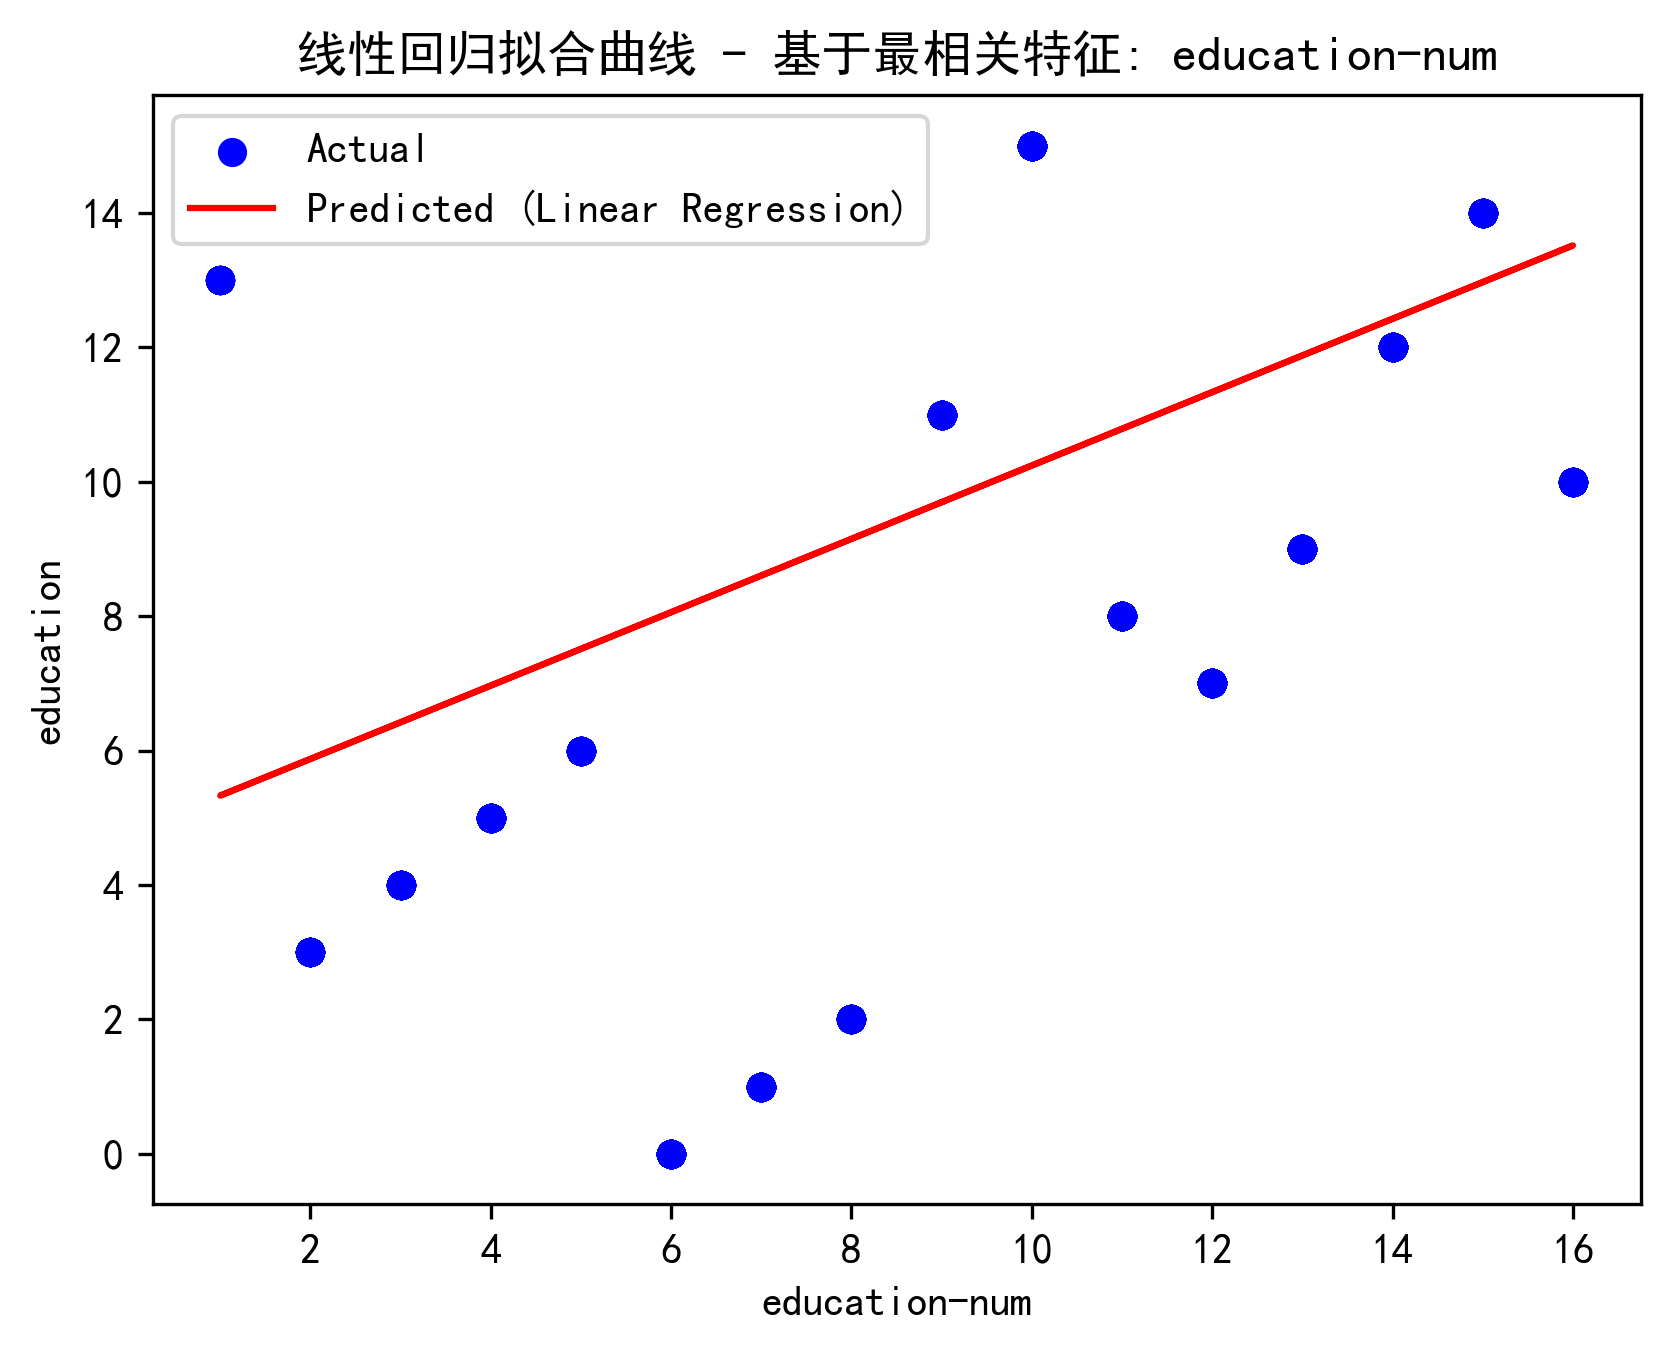

In [150]:
# 绘制拟合曲线
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred_lr, color='red', label='Predicted (Linear Regression)')
plt.xlabel(top_feature[0])
plt.xticks()
plt.ylabel("education")
plt.title(f"线性回归拟合曲线 - 基于最相关特征: {top_feature[0]}")
plt.legend()
plt.show()

### 使用网格搜索找到最佳参数——多项式回归

In [151]:
from sklearn.pipeline import Pipeline

# 定义要搜索的多项式次数范围，可根据实际情况调整范围和步长
param_grid = {'polynomialfeatures__degree': np.arange(1, 30)}  # 注意这里参数名的写法，用"polynomialfeatures__degree" 来指定是PolynomialFeatures步骤中的degree参数

# 创建管道，将多项式特征生成和线性回归组合在一起
pipe = Pipeline([
    ('polynomialfeatures', PolynomialFeatures()),
    ('linearregression', LinearRegression())
])

# 创建GridSearchCV对象，用于搜索最佳参数组合
grid_search = GridSearchCV(estimator=pipe, param_grid=param_grid, cv=3,  # 5折交叉验证，可按需调整
                           scoring='neg_mean_squared_error')  # 以负均方误差作为评估指标，GridSearchCV会自动寻找使其最小化的值

# 进行网格搜索，拟合模型找到最佳参数
grid_search.fit(X_train, y_train)

# 获取最佳多项式次数
best_degree = grid_search.best_params_['polynomialfeatures__degree']

# 使用最佳的多项式次数重新构建多项式特征转换和拟合线性回归模型（这里通过管道的方式更方便了）
pipe_best = Pipeline([
    ('polynomialfeatures', PolynomialFeatures(degree=best_degree)),
    ('linearregression', LinearRegression())
])
pipe_best.fit(X_train, y_train)
y_pred_poly_best = pipe_best.predict(X_test)

print("\n--- Polynomial Regression with Best Degree ---")
print("最佳多项式次数:", best_degree)
print("均方误差:", mean_squared_error(y_test, y_pred_poly_best))
print("R2得分:", r2_score(y_test, y_pred_poly_best))


--- Polynomial Regression with Best Degree ---
最佳多项式次数: 20
均方误差: 0.36385920456646637
R2得分: 0.9753680721390434


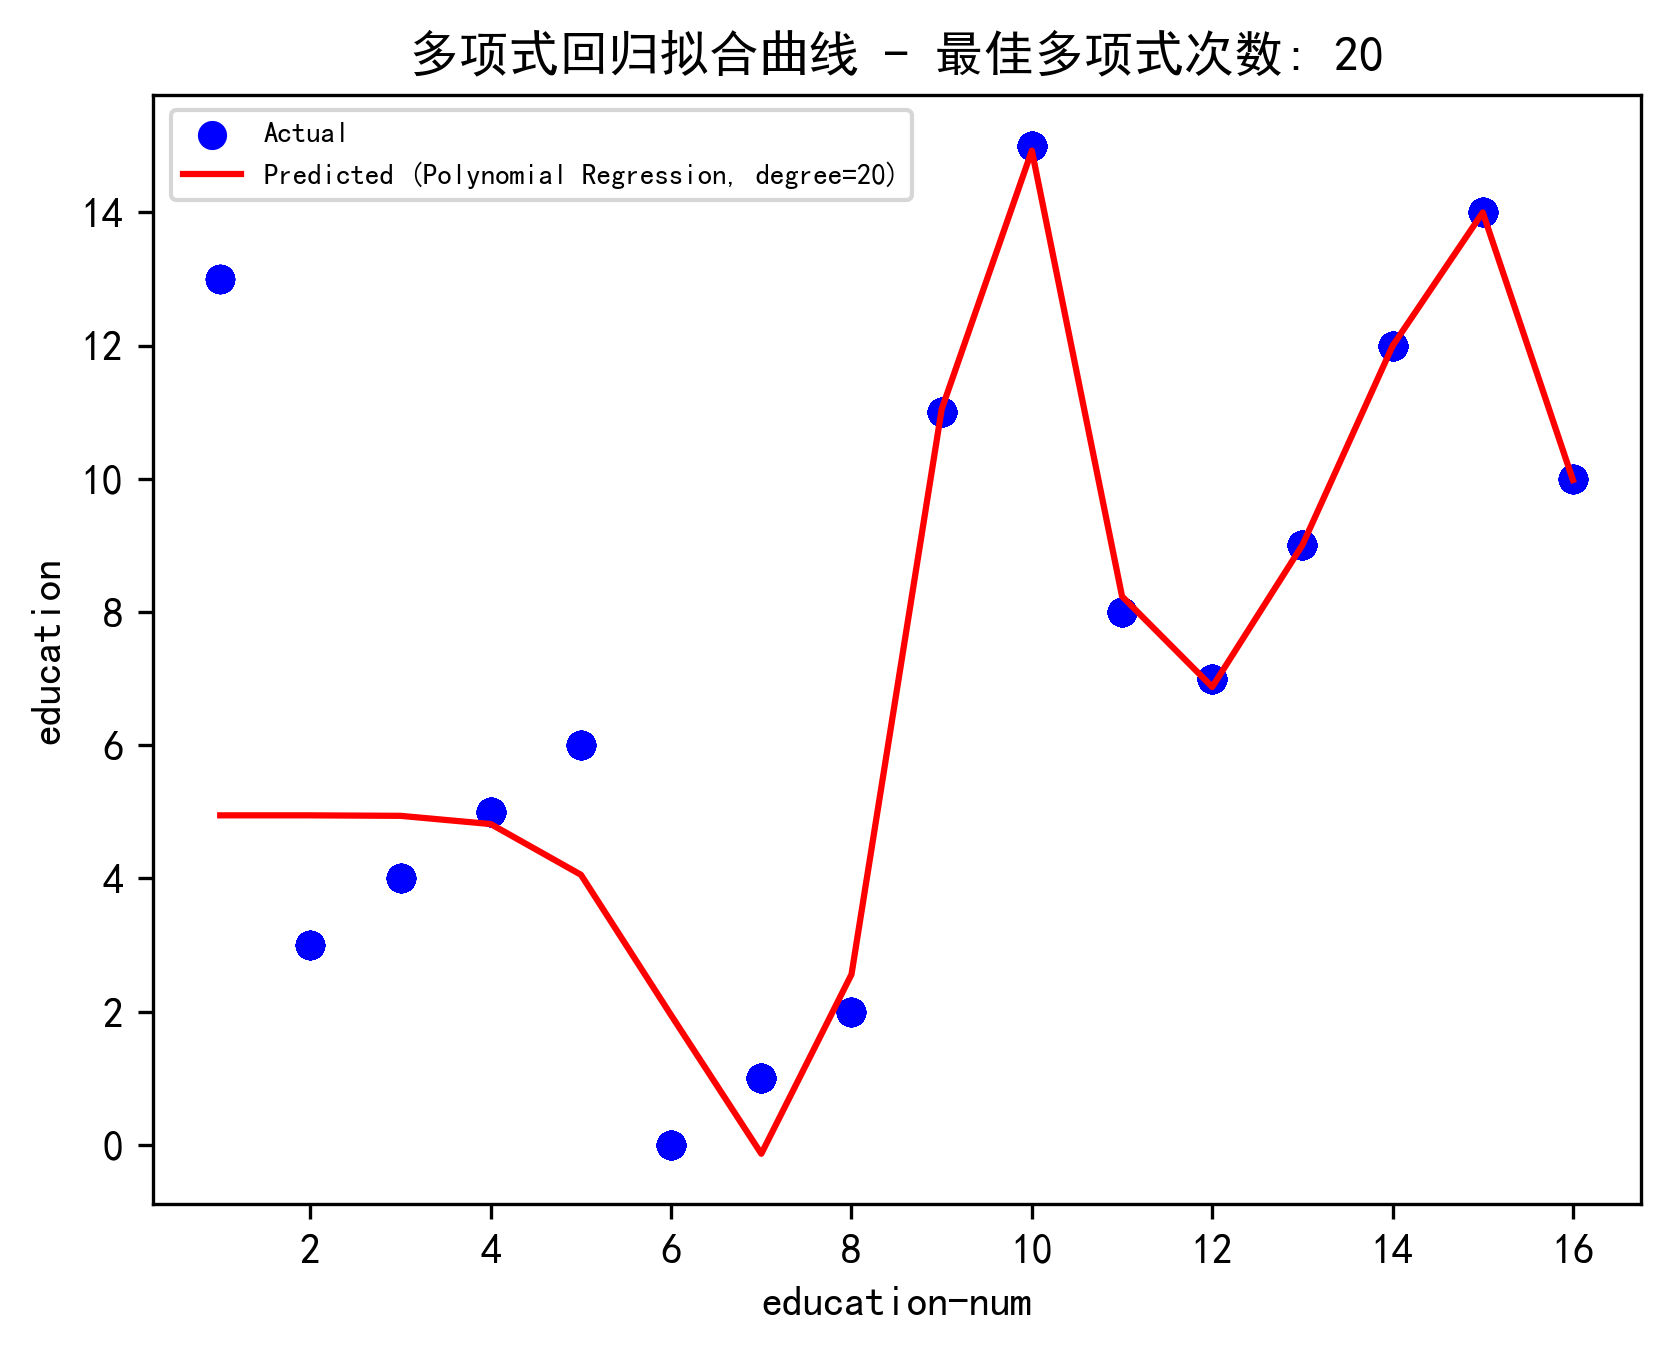

In [152]:
# 绘制拟合曲线
plt.scatter(X_test.iloc[:, 0], y_test, color='blue', label='Actual')  # 使用 X_test 的第一列作为 x 轴数据
# 对X_test进行排序，以便绘制平滑的曲线
sorted_idx = np.argsort(X_test.iloc[:, 0])  # 使用 X_test 的第一列进行排序
plt.plot(X_test.iloc[sorted_idx, 0], y_pred_poly_best[sorted_idx], color='red', label=f'Predicted (Polynomial Regression, degree={best_degree})')
plt.xlabel(top_feature[0])
plt.ylabel("education")
plt.title(f"多项式回归拟合曲线 - 最佳多项式次数: {best_degree}")
plt.legend(loc='upper right', bbox_to_anchor=(0.52, 1.0), fontsize='x-small')  # 缩小图例并调整位置
plt.show()

### 普通——随机森林

In [160]:
# 随机森林模型
dt_reg = RandomForestRegressor(max_depth=5, random_state=42)
dt_reg.fit(X_train, y_train)
y_pred_dt = dt_reg.predict(X_test)
print("\n--- RandomForest Regression ---")
print("均方误差:", mean_squared_error(y_test, y_pred_dt))
print("R2得分:", r2_score(y_test, y_pred_dt))


--- RandomForest Regression ---
均方误差: 0.0
R2得分: 1.0


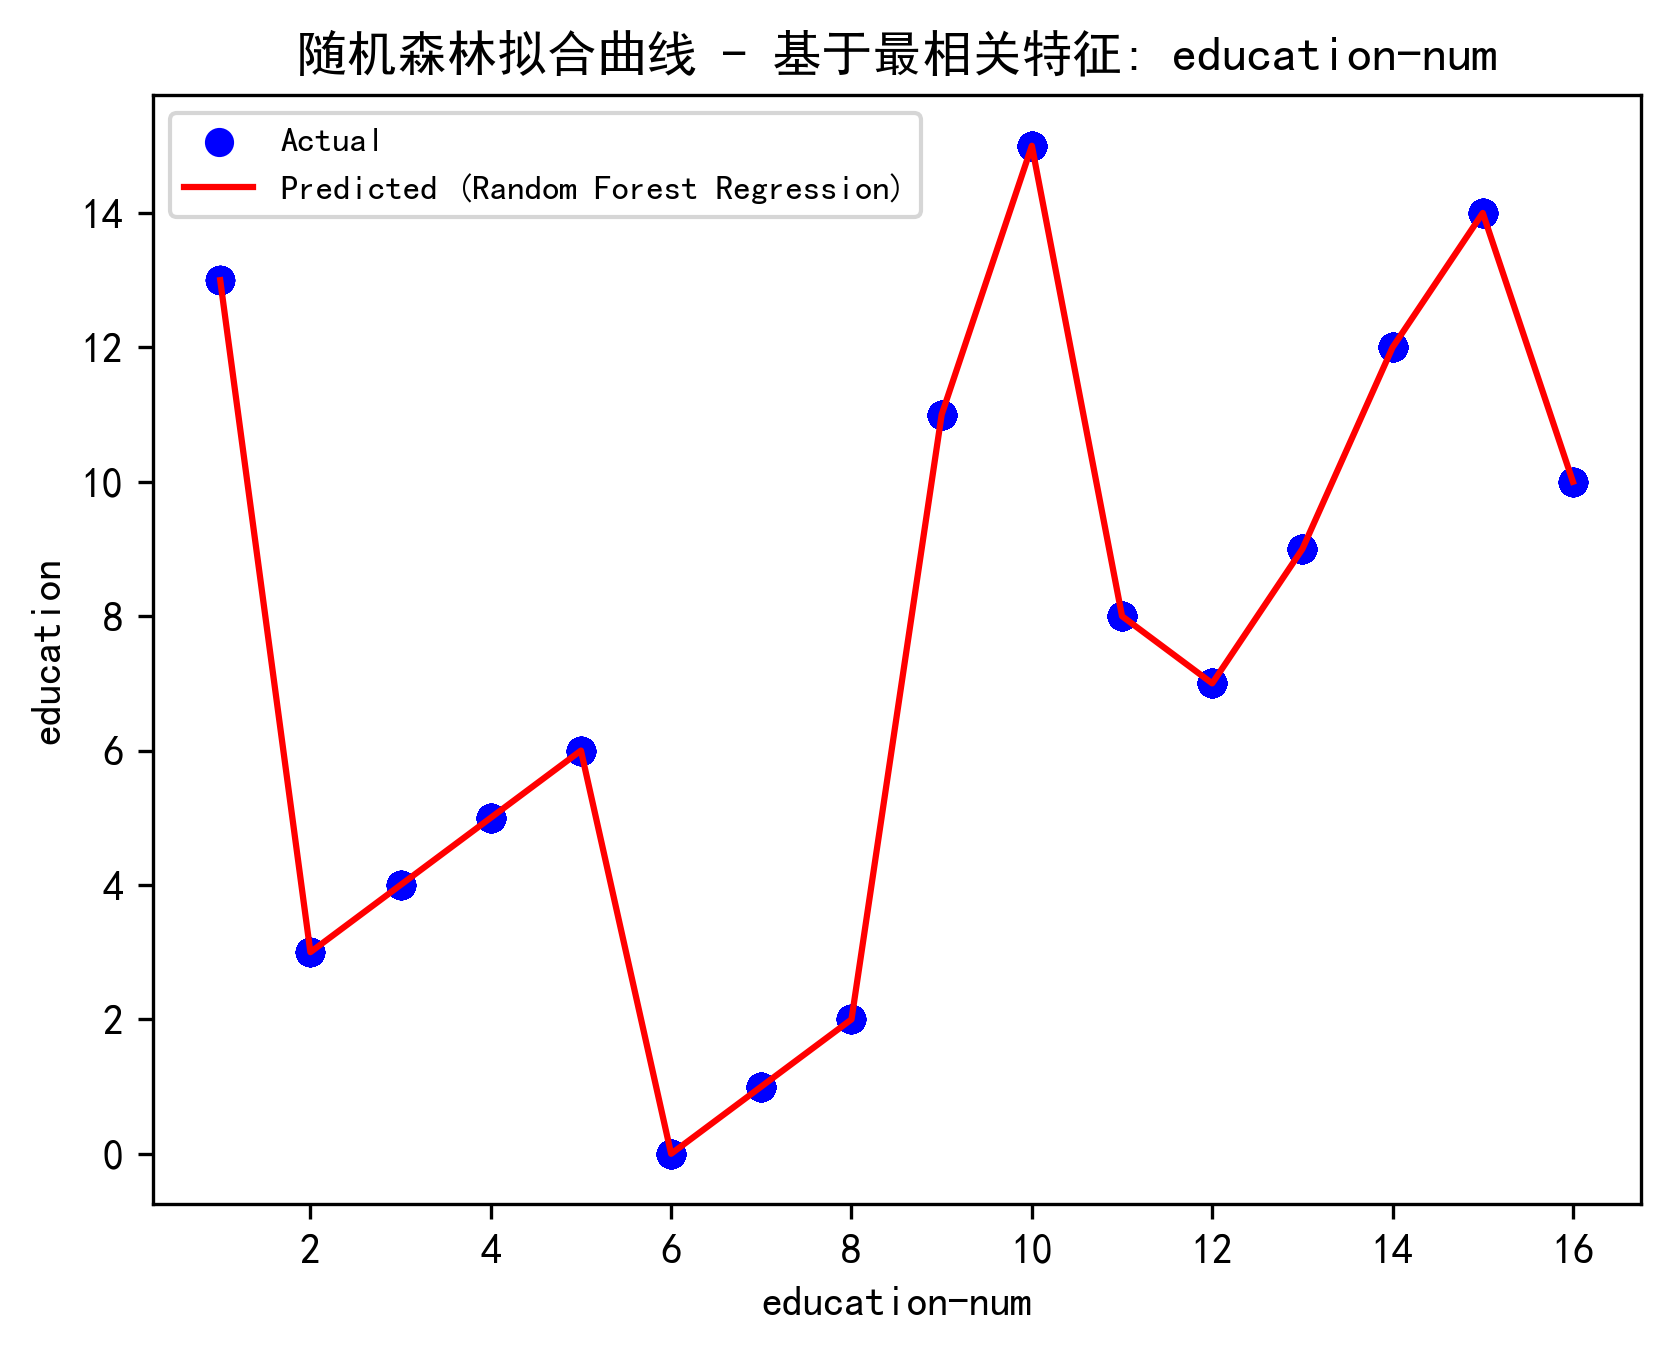

In [161]:
# 绘制拟合曲线
plt.scatter(X_test.iloc[:, 0], y_test, color='blue', label='Actual')  # 使用 X_test 的第一列作为 x 轴数据
# 对X_test进行排序，以便绘制平滑的曲线
sorted_idx = np.argsort(X_test.iloc[:, 0])  # 使用 X_test 的第一列进行排序
plt.plot(X_test.iloc[sorted_idx, 0], y_pred_dt[sorted_idx], color='red', label='Predicted (Random Forest Regression)')
plt.xlabel(top_feature[0])
plt.ylabel("education")
plt.title(f"随机森林拟合曲线 - 基于最相关特征: {top_feature[0]}")
plt.legend(loc='upper left', fontsize='small')
plt.show()

### 使用随机搜索找到最佳参数——随机森林

In [163]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# 定义要搜索的参数分布，这里以'max_depth'（树的最大深度）、'n_estimators'（决策树的数量）、'min_samples_split'（内部节点再划分所需最小样本数）和'min_samples_leaf'（叶子节点最少样本数）为例，你可以根据实际情况添加或调整其他参数
param_distributions = {
    'max_depth': np.arange(3, 11),  # 树的最大深度的取值范围，可根据数据复杂度等调整
    'n_estimators': np.arange(50, 201, 10),  # 决策树的数量的取值范围，步长为10
    'min_samples_split': np.arange(2, 11),  # 内部节点再划分所需最小样本数的取值范围
    'min_samples_leaf': np.arange(1, 6)  # 叶子节点最少样本数的取值范围
}

# 创建随机森林回归模型对象（先不指定具体参数，后续由随机搜索确定合适值）
dt_reg = RandomForestRegressor(random_state=42)

# 创建RandomizedSearchCV对象，设置随机搜索的相关参数
random_search = RandomizedSearchCV(estimator=dt_reg,
                                   param_distributions=param_distributions,
                                   n_iter=20,  # 随机搜索尝试的参数组合数量，可根据计算资源和时间等调整
                                   cv=5,  # 5折交叉验证，可按需调整
                                   scoring='neg_mean_squared_error',  # 以负均方误差作为评估指标，RandomizedSearchCV会自动寻找使其最小化的值
                                   random_state=42)  # 保证每次运行随机搜索结果可复现

# 进行随机搜索，拟合模型找到合适参数
random_search.fit(X_train, y_train)

# 获取最佳参数组合
best_params = random_search.best_params_
print("\n--- RandomForest Regression with Best Parameters ---")
print("最佳参数:", best_params)

# 使用最佳参数重新构建随机森林模型并拟合数据
best_dt_reg = RandomForestRegressor(**best_params, random_state=42)
best_dt_reg.fit(X_train, y_train)
y_pred_dt_best = best_dt_reg.predict(X_test)

print("均方误差:", mean_squared_error(y_test, y_pred_dt_best))
print("R2得分:", r2_score(y_test, y_pred_dt_best))


--- RandomForest Regression with Best Parameters ---
最佳参数: {'n_estimators': 190, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_depth': 10}
均方误差: 0.0
R2得分: 1.0


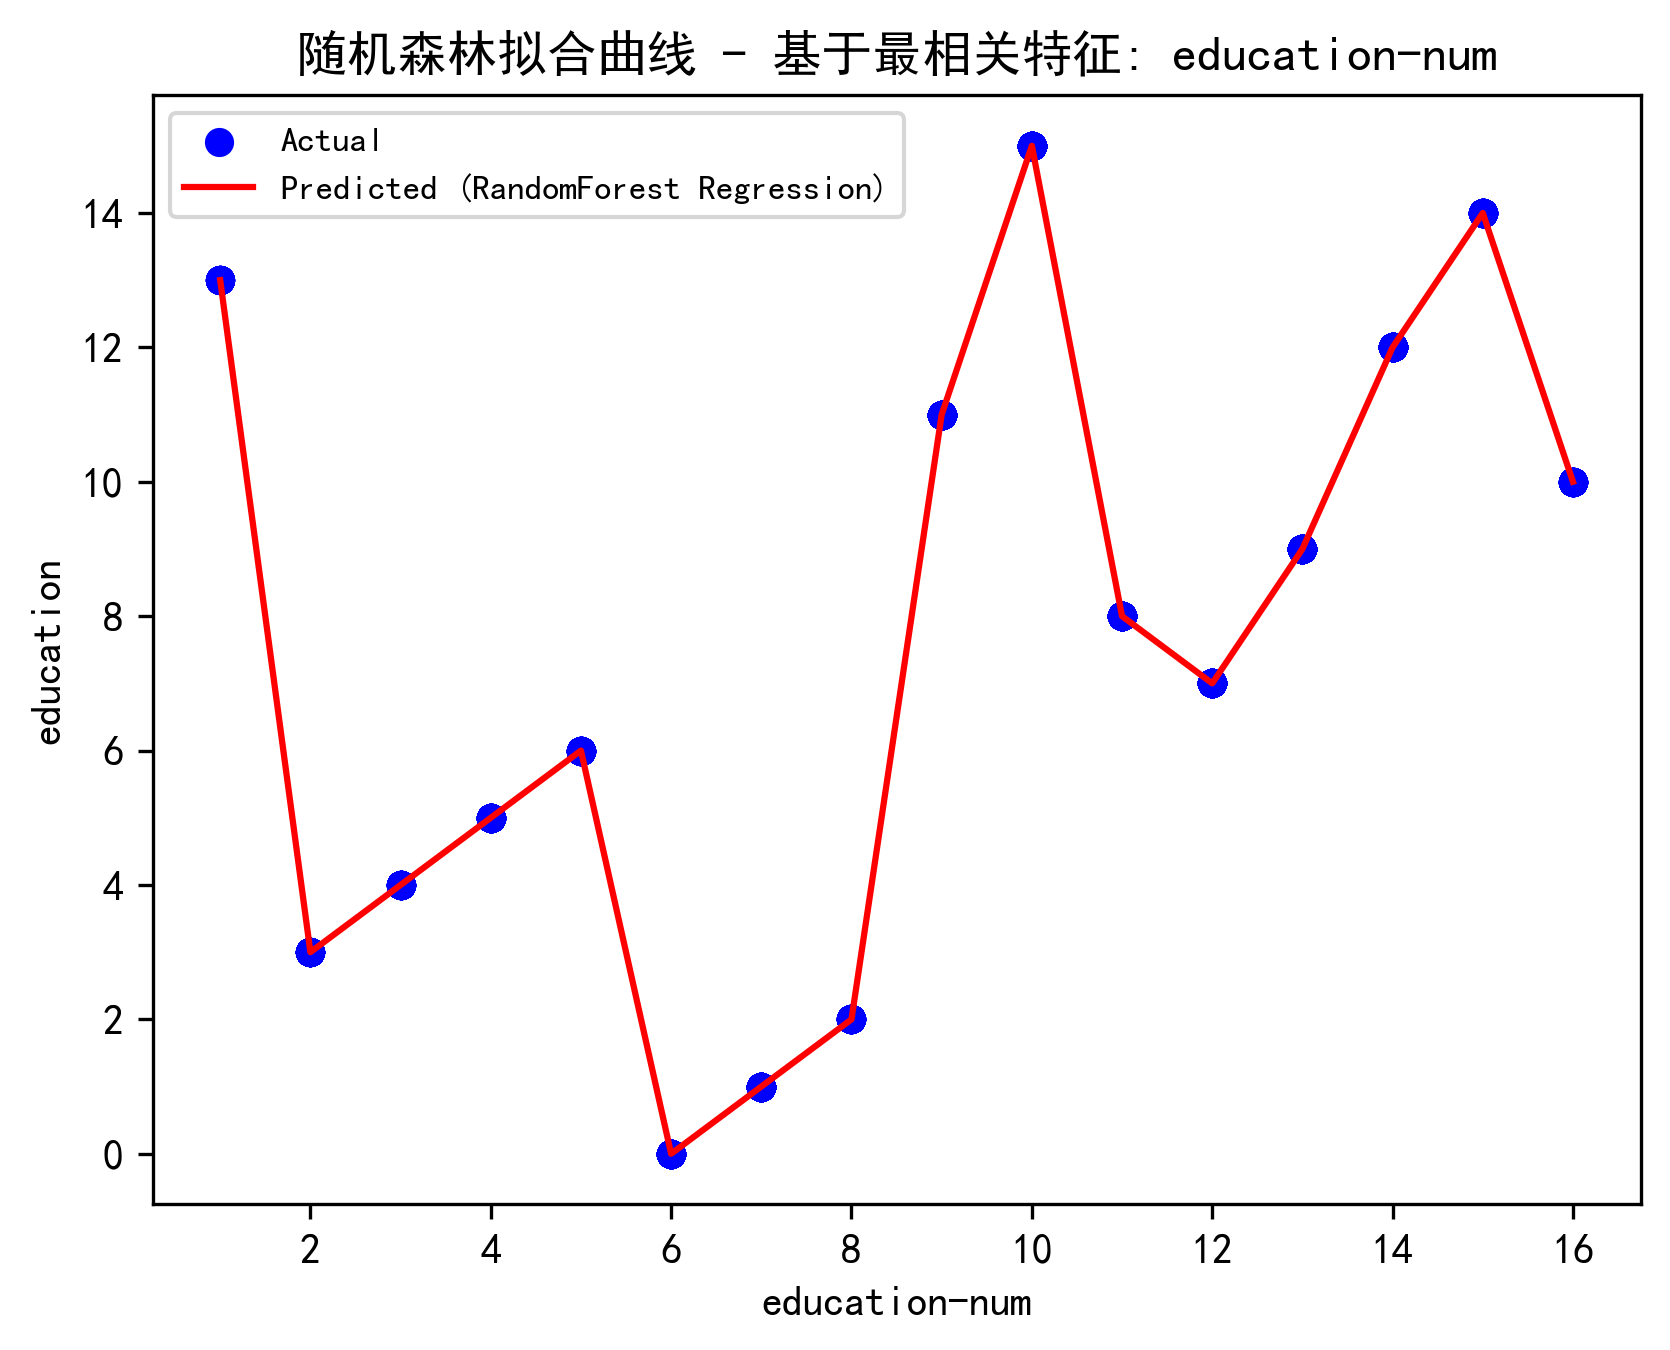

In [164]:
# 绘制拟合曲线
plt.scatter(X_test.iloc[:, 0], y_test, color='blue', label='Actual')  # 使用 X_test 的第一列作为 x 轴数据
# 对X_test进行排序，以便绘制平滑的曲线
sorted_idx = np.argsort(X_test.iloc[:, 0])  # 使用 X_test 的第一列进行排序
plt.plot(X_test.iloc[sorted_idx, 0], y_pred_dt_best[sorted_idx], color='red', label='Predicted (RandomForest Regression)')
plt.xlabel(top_feature[0])
plt.ylabel("education")
plt.title(f"随机森林拟合曲线 - 基于最相关特征: {top_feature[0]}")
plt.legend(loc='upper left', fontsize='small')
plt.show()